<a href="https://colab.research.google.com/github/Arya-Raj/Utilizing-new-RL-algorithms-for-solving-combinatorial-optimization-problems-TSP-/blob/main/RL_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RL

In [ ]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance_matrix

In [ ]:
def update_q(q, dist_mat, state, action, alpha=0.012, gamma=0.9):
   immed_reward =dist_mat[state,action]  
   delayed_reward = q[action,:].max()
   q[state,action] += alpha * (immed_reward + gamma * delayed_reward - q[state,action]) # Q(s,a) = Q(s,a)+ alpha *(R(s,a) + gamma* max Q(s',a') - Q(s,a))
   return q

def find_the_best():
  q = np.zeros([n,n]) 
  epsilon = 1. 
  n_train = 8000 
  for i in range(n_train): 
    traj = [0] 
    state = 0
    possible_actions = [ dest for dest in range(n) if dest not in traj] 
    
    while possible_actions: 
      if random.random() < epsilon: 
        action = random.choice(possible_actions) 
      else:  
        best_action_index = q[state, possible_actions].argmax() 
        action = possible_actions[best_action_index] 
      q = update_q(q, dist_mat, state, action)
      traj.append(action) 
      state = traj[-1] 
      possible_actions = [ dest for dest in range(n) if dest not in traj] 
    
    action = 0
    q = update_q(q, dist_mat, state, action) 
    traj.append(0) 
    epsilon = 1. - i * 1/n_train
  
  traj = [0] 
  state = 0
  distance_travel = 0.
  possible_actions = [ dest for dest in range(n) if dest not in traj ] 
  while possible_actions: # until all destinations are visited 
     best_action_index = q[state, possible_actions].argmax() 
     action = possible_actions[best_action_index] 
     distance_travel += dist_mat[state, action] 
     traj.append(action) 
     state = traj[-1] 
     possible_actions = [ dest for dest in range(n) if dest not in traj ] 
  # Back to the first node
  action = 0
  distance_travel += dist_mat[state, action] 
  traj.append(action) 
 
 
  print('Best trajectory found:') 
  print(' -> '.join([str(b) for b in traj])) 
  print(f'Distance Travelled: {-1*distance_travel}')
  return(traj)

def plot_the_best(traj):
  plt.scatter(coords[:,0],coords[:,1])
  for i in traj:
    plt.plot([coords[traj[i],0],coords[traj[i+1],0]],[coords[traj[i],1],coords[traj[i+1],1]])

## 4 nodes

Best trajectory found:
0 -> 1 -> 2 -> 3 -> 0
Distance Travelled: 1.10180146


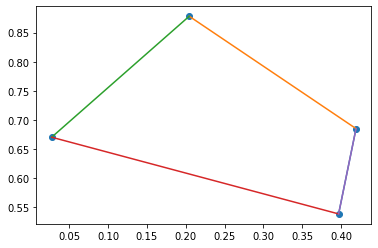

In [ ]:
coords=np.array([[0.39676747, 0.53881673],
        [0.41919451, 0.6852195 ],
        [0.20445225, 0.87811744],
        [0.02738759, 0.67046751]])
dist_mat=np. array([[0.        , 0.14811057, 0.39001296, 0.39213955],
        [0.14811057, 0.        , 0.28865872, 0.39208454],
        [0.39001296, 0.28865872, 0.        , 0.27289262],
        [0.39213955, 0.39208454, 0.27289262, 0.        ]])
dist_mat=-1*dist_mat
n=4
traj=find_the_best()
plot_the_best(traj)

##5 nodes

Best trajectory found:
0 -> 3 -> 1 -> 4 -> 2 -> 0
Distance Travelled: 11.52145127


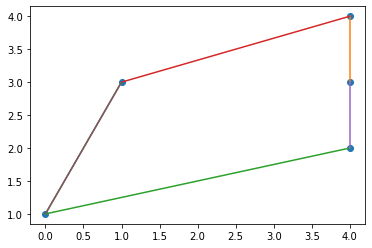

In [ ]:
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])
dist_mat=-1*dist_mat
n=5
traj=find_the_best()
plot_the_best(traj)


In [ ]:
def get_graph_mat(n, size=1):
#    """ Throws n nodes uniformly at random on a square, and build a (fully connected) graph.
#        Returns the (N, 2) coordinates matrix, and the (N, N) matrix containing pairwise euclidean distances.
#    """
    coords = size * np.random.uniform(size=(n,2))
    dist_mat = distance_matrix(coords, coords)
    return coords, dist_mat
n=3
coords,dist_mat=get_graph_mat(4)
#dist_mat*=-1
coords,dist_mat

(array([[0.39676747, 0.53881673],
        [0.41919451, 0.6852195 ],
        [0.20445225, 0.87811744],
        [0.02738759, 0.67046751]]),
 array([[0.        , 0.14811057, 0.39001296, 0.39213955],
        [0.14811057, 0.        , 0.28865872, 0.39208454],
        [0.39001296, 0.28865872, 0.        , 0.27289262],
        [0.39213955, 0.39208454, 0.27289262, 0.        ]]))

##10 nodes

Best trajectory found:
0 -> 7 -> 3 -> 2 -> 1 -> 4 -> 5 -> 9 -> 6 -> 8 -> 0
Distance Travelled: 3.3932279800000007


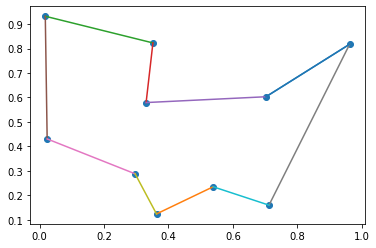

In [ ]:
n=10
coords=np.array([[0.96222682, 0.81789497],
       [0.01782511, 0.93226486],
       [0.3518051 , 0.82315222],
       [0.33063835, 0.57929051],
       [0.02360734, 0.4305754 ],
       [0.29650064, 0.28795597],
       [0.53866827, 0.23490321],
       [0.70254764, 0.60307924],
       [0.71190645, 0.15977665],
       [0.36290907, 0.12392136]])

dist_mat=np.array([[-0.        , -0.95130178, -0.61044436, -0.67515633, -1.01539302,
        -0.85089758, -0.72061171, -0.33701494, -0.70411647, -0.91694118],
       [-0.95130178, -0.        , -0.35135197, -0.47163865, -0.50172278,
        -0.70199288, -0.87039697, -0.75974214, -1.03850227, -0.87892102],
       [-0.61044436, -0.35135197, -0.        , -0.2447786 , -0.51169359,
        -0.5380461 , -0.61721531, -0.41406816, -0.75481132, -0.69931902],
       [-0.67515633, -0.47163865, -0.2447786 , -0.        , -0.34115133,
        -0.29332781, -0.40234197, -0.37266932, -0.5668838 , -0.45651119],
       [-1.01539302, -0.50172278, -0.51169359, -0.34115133, -0.        ,
        -0.30791404, -0.55097675, -0.70051232, -0.73965373, -0.45734272],
       [-0.85089758, -0.70199288, -0.5380461 , -0.29332781, -0.30791404,
        -0.        , -0.24791079, -0.51398137, -0.43473202, -0.17696732],
       [-0.72061171, -0.87039697, -0.61721531, -0.40234197, -0.55097675,
        -0.24791079, -0.        , -0.40300129, -0.18882655, -0.20786599],
       [-0.33701494, -0.75974214, -0.41406816, -0.37266932, -0.70051232,
        -0.51398137, -0.40300129, -0.        , -0.44340137, -0.58732158],
       [-0.70411647, -1.03850227, -0.75481132, -0.5668838 , -0.73965373,
        -0.43473202, -0.18882655, -0.44340137, -0.        , -0.3508344 ],
       [-0.91694118, -0.87892102, -0.69931902, -0.45651119, -0.45734272,
        -0.17696732, -0.20786599, -0.58732158, -0.3508344 , -0.        ]])
s=find_the_best()
plot_the_best(s)



##20 nodes

Best trajectory found:
0 -> 19 -> 4 -> 12 -> 7 -> 15 -> 16 -> 18 -> 3 -> 13 -> 2 -> 9 -> 10 -> 5 -> 17 -> 1 -> 14 -> 8 -> 11 -> 6 -> 0
Distance Travelled: 3.7482540499999994


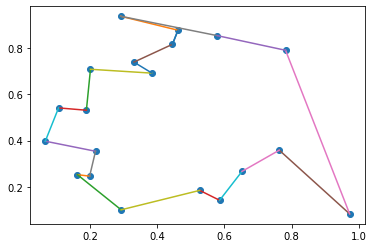

In [ ]:
n=20
coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[-0.        , -0.60001635, -0.69288158, -0.57828654, -0.19026258,
        -0.74614952, -0.18085482, -0.31029269, -0.3314574 , -0.79518088,
        -0.69595595, -0.11921825, -0.20112521, -0.68394958, -0.94464125,
        -0.4404823 , -0.48896882, -0.63981237, -0.62148559, -0.06305272],
       [-0.60001635, -0.        , -0.6096485 , -0.54643148, -0.57611814,
        -0.2801591 , -0.74710006, -0.66153736, -0.43257423, -0.5363238 ,
        -0.2936458 , -0.5286757 , -0.50420209, -0.57504916, -0.34629786,
        -0.59903565, -0.68129507, -0.14390819, -0.69684521, -0.5574272 ],
       [-0.69288158, -0.6096485 , -0.        , -0.11472279, -0.5152005 ,
        -0.43726687, -0.69741322, -0.45760971, -0.82029961, -0.20019115,
        -0.37011518, -0.73140247, -0.49214671, -0.03700231, -0.82736361,
        -0.280085  , -0.29420794, -0.48979777, -0.17340941, -0.63098083],
       [-0.57828654, -0.54643148, -0.11472279, -0.        , -0.40229003,
        -0.42563941, -0.58895042, -0.35501951, -0.71433719, -0.26453563,
        -0.3530685 , -0.61758619, -0.37745903, -0.10916506, -0.80293554,
        -0.17962112, -0.21741289, -0.44426651, -0.1555766 , -0.51630174],
       [-0.19026258, -0.57611814, -0.5152005 , -0.40229003, -0.        ,
        -0.64985727, -0.20233598, -0.13289996, -0.45378969, -0.64016338,
        -0.58843568, -0.27307583, -0.07191649, -0.5107664 , -0.91813886,
        -0.25165433, -0.29915086, -0.57173305, -0.43192382, -0.13808814],
       [-0.74614952, -0.2801591 , -0.43726687, -0.42563941, -0.64985727,
        -0.        , -0.84890351, -0.68464087, -0.67800129, -0.29566197,
        -0.07305885, -0.71240533, -0.58566454, -0.40039258, -0.39123464,
        -0.55569503, -0.6237957 , -0.14162712, -0.57799997, -0.68935477],
       [-0.18085482, -0.74710006, -0.69741322, -0.58895042, -0.20233598,
        -0.84890351, -0.        , -0.24641672, -0.51197429, -0.83749015,
        -0.78924013, -0.29933824, -0.26325144, -0.69806256, -1.09326217,
        -0.41921273, -0.43747985, -0.76213478, -0.5852434 , -0.19605849],
       [-0.31029269, -0.66153736, -0.45760971, -0.35501951, -0.13289996,
        -0.68464087, -0.24641672, -0.        , -0.58591801, -0.61481798,
        -0.61647621, -0.40423899, -0.18378021, -0.46245904, -0.99282405,
        -0.1775649 , -0.19217537, -0.6310855 , -0.33891272, -0.26668711],
       [-0.3314574 , -0.43257423, -0.82029961, -0.71433719, -0.45378969,
        -0.67800129, -0.51197429, -0.58591801, -0.        , -0.84582561,
        -0.65771907, -0.21265702, -0.40923866, -0.79759615, -0.7332192 ,
        -0.64659318, -0.71959818, -0.53979921, -0.81561159, -0.33733856],
       [-0.79518088, -0.5363238 , -0.20019115, -0.26453563, -0.64016338,
        -0.29566197, -0.83749015, -0.61481798, -0.84582561, -0.        ,
        -0.24827655, -0.80598355, -0.59838216, -0.17315241, -0.67977252,
        -0.44309958, -0.47858707, -0.39595434, -0.37286812, -0.73221293],
       [-0.69595595, -0.2936458 , -0.37011518, -0.3530685 , -0.58843568,
        -0.07305885, -0.78924013, -0.61647621, -0.65771907, -0.24827655,
        -0.        , -0.67154895, -0.52668963, -0.33311421, -0.45741009,
        -0.48358187, -0.55093118, -0.15021474, -0.50612738, -0.63725743],
       [-0.11921825, -0.5286757 , -0.73140247, -0.61758619, -0.27307583,
        -0.71240533, -0.29933824, -0.40423899, -0.21265702, -0.80598355,
        -0.67154895, -0.        , -0.25299983, -0.71682005, -0.86599412,
        -0.50566234, -0.5661908 , -0.59196952, -0.6857113 , -0.13849416],
       [-0.20112521, -0.50420209, -0.49214671, -0.37745903, -0.07191649,
        -0.58566454, -0.26325144, -0.18378021, -0.40923866, -0.59838216,
        -0.52668963, -0.25299983, -0.        , -0.48282438, -0.84642083,
        -0.25266693, -0.31600766, -0.50232732, -0.43292366, -0.13884631],
       [-0.68394958, -0.57504916, -0.03700231, -0.10916506, -0.5107664 ,
        -0.40039258, -0.69806256, -0.46245904, -0.79759615, -0.17315241,
        -0.33311421, -0.71682005, -0.48282438, -0.        , -0.79037877,
        -0.28546752, -0.30945139, -0.45363729, -0.20068363, -0.62148642],
       [-0.94464125, -0.34629786, -0.82736361, -0.80293554, -0.91813886,
        -0.39123464, -1.09326217, -0.99282405, -0.7332192 , -0.67977252,
        -0.45741009, -0.86599412, -0.84642083, -0.79037877, -0.        ,
        -0.90237746, -0.97968778, -0.3692403 , -0.9582732 , -0.90352714],
       [-0.4404823 , -0.59903565, -0.280085  , -0.17962112, -0.25165433,
        -0.55569503, -0.41921273, -0.1775649 , -0.64659318, -0.44309958,
        -0.48358187, -0.50566234, -0.25266693, -0.28546752, -0.90237746,
        -0.        , -0.08333794, -0.53313762, -0.18134226, -0.38327394],
       [-0.48896882, -0.68129507, -0.29420794, -0.21741289, -0.29915086,
        -0.6237957 , -0.43747985, -0.19217537, -0.71959818, -0.47858707,
        -0.55093118, -0.5661908 , -0.31600766, -0.30945139, -0.97968778,
        -0.08333794, -0.        , -0.610796  , -0.14934068, -0.43642365],
       [-0.63981237, -0.14390819, -0.48979777, -0.44426651, -0.57173305,
        -0.14162712, -0.76213478, -0.6310855 , -0.53979921, -0.39595434,
        -0.15021474, -0.59196952, -0.50232732, -0.45363729, -0.3692403 ,
        -0.53313762, -0.610796  , -0.        , -0.5994127 , -0.58756916],
       [-0.62148559, -0.69684521, -0.17340941, -0.1555766 , -0.43192382,
        -0.57799997, -0.5852434 , -0.33891272, -0.81561159, -0.37286812,
        -0.50612738, -0.6857113 , -0.43292366, -0.20068363, -0.9582732 ,
        -0.18134226, -0.14934068, -0.5994127 , -0.        , -0.56461214],
       [-0.06305272, -0.5574272 , -0.63098083, -0.51630174, -0.13808814,
        -0.68935477, -0.19605849, -0.26668711, -0.33733856, -0.73221293,
        -0.63725743, -0.13849416, -0.13884631, -0.62148642, -0.90352714,
        -0.38327394, -0.43642365, -0.58756916, -0.56461214, -0.        ]])
s=find_the_best()
plot_the_best(s)

#DQN(Modified)

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from torchsummary import summary
import random

In [ ]:
SEED=1
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
class RLnetwork(nn.Module):
  def __init__(self,hidden1_size,hidden2_size,hidden3_size,hidden4_size,n):
    super().__init__()
    self.layer1=nn.Linear(1,hidden1_size)
    self.hidden1=nn.Linear(hidden1_size,hidden2_size)
    self.hidden2=nn.Linear(hidden2_size,hidden3_size)
    self.hidden3=nn.Linear(hidden3_size,hidden4_size)
    self.hidden4=nn.Linear(hidden4_size,hidden4_size)
    self.out=nn.Linear(hidden4_size,n)

  def forward(self,state):
    layer1=self.layer1(state)
    layer2=F.relu(self.hidden1(layer1))
    layer3=F.relu(self.hidden2(layer2))
    layer4=F.relu(self.hidden3(layer3))
    layer5=F.relu(self.hidden4(layer4))
    output=self.out(layer5)
    return output


In [ ]:

def plot_the_best(path):
  plt.scatter(coords[:,0],coords[:,1])
  for i in path:
    plt.plot([coords[path[i],0],coords[path[i+1],0]],[coords[path[i],1],coords[path[i+1],1]])

##4 nodes

In [ ]:
n=4
model=RLnetwork(64,32,32,32,n)
#model=RLnetwork(5,10,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

In [ ]:
x=dict()
m=[]
coords=np.array([[0.39676747, 0.53881673],
        [0.41919451, 0.6852195 ],
        [0.20445225, 0.87811744],
        [0.02738759, 0.67046751]])
dist_mat=np. array([[0.        , 0.14811057, 0.39001296, 0.39213955],
        [0.14811057, 0.        , 0.28865872, 0.39208454],
        [0.39001296, 0.28865872, 0.        , 0.27289262],
        [0.39213955, 0.39208454, 0.27289262, 0.        ]])
dist_mat=-1*dist_mat




In [ ]:
epsilon=1.
e=1000
for episode in range(e):
  state=0
  path=[state]
  q_s_a_loss=[]
  target_loss=[]

  for i in range(n-1):
    action_prob=model(torch.FloatTensor([state]))
    if epsilon > random.random():      
      q_s_a=random.choice(action_prob)
      action=action_prob.tolist().index(q_s_a)
      while action in path:
        q_s_a=random.choice(action_prob)
        action=action_prob.tolist().index(q_s_a)
      #print('action explore',action)         
    else:
      sorted_prob=action_prob.argsort(descending=True)
      #print('action_prob',action_prob,'sorted_prob',sorted_prob)
      for i in sorted_prob:
        if i not in path:
          action=i
          q_s_a=action_prob[i]          
          #print('action exploit',action)
          #print('Q(',state,',',int(i),')','=',float(action_prob[i]))
          break
    q_s_a_loss.append(q_s_a)
    
    next_action_prob=model(torch.FloatTensor([action]))
    sorted_prob=next_action_prob.argsort(descending=True)
    #print('next_action_prob',next_action_prob,'sorted_prob',sorted_prob)
    target=dist_mat[state,action]+0.9*next_action_prob[sorted_prob[0]]
    target_loss.append(target)

    
    #print('Q(',int(action),',',int(i),')','=',float(next_action_prob[i]))
    


    path.append(int(action))
    state=int(action)

  qloss=torch.stack(q_s_a_loss).sum()
  tloss=torch.stack(target_loss).sum()
  loss=F.mse_loss(qloss,tloss)
  loss.backward()
  #torch.autograd.set_detect_anomaly(True)
  optimizer.step()
  lr_scheduler.step()
  optimizer.zero_grad()

  epsilon=1-episode/e
  path.append(path[0])
  total_dist=0
  for i in range(len(path)-1):
    total_dist+=dist_mat[path[i],path[i+1]]
  print('episode number {} total distance {}'.format(episode,-total_dist))
  if episode==0:
    x[-total_dist]=path
    m.append(-total_dist)
  if episode>0:
    if -total_dist<m[-1]:
      x[-total_dist]=path
      m.append(-total_dist)


#path=list(x.values())[-1]
#plot_the_best(path)  
  
  
  

episode number 0 total distance 1.20310069
episode number 1 total distance 1.10180146
episode number 2 total distance 1.20310069
episode number 3 total distance 1.10180146
episode number 4 total distance 1.20310069
episode number 5 total distance 1.20310069
episode number 6 total distance 1.4628957699999998
episode number 7 total distance 1.46289577
episode number 8 total distance 1.4628957699999998
episode number 9 total distance 1.20310069
episode number 10 total distance 1.2031006899999999
episode number 11 total distance 1.46289577
episode number 12 total distance 1.46289577
episode number 13 total distance 1.10180146
episode number 14 total distance 1.46289577
episode number 15 total distance 1.2031006899999999
episode number 16 total distance 1.10180146
episode number 17 total distance 1.46289577
episode number 18 total distance 1.4628957699999998
episode number 19 total distance 1.20310069
episode number 20 total distance 1.46289577
episode number 21 total distance 1.20310069
ep

[0, 3, 2, 1, 0]

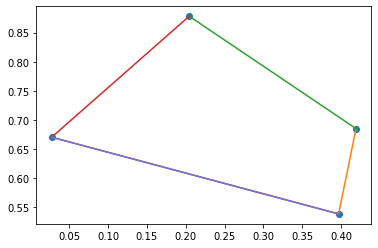

In [ ]:
ans=list(x.values())[-1]
plot_the_best(ans)
ans

##5 nodes

In [ ]:
n=5
model=RLnetwork(64,32,32,32,n)
#model=RLnetwork(5,10,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

In [ ]:
x=dict()
m=[]
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])
dist_mat=-1*dist_mat


In [ ]:
epsilon=1.
e=1000
for episode in range(e):
  state=0
  path=[state]
  q_s_a_loss=[]
  target_loss=[]

  for i in range(n-1):
    action_prob=model(torch.FloatTensor([state]))
    if epsilon > random.random():      
      q_s_a=random.choice(action_prob)
      action=action_prob.tolist().index(q_s_a)
      while action in path:
        q_s_a=random.choice(action_prob)
        action=action_prob.tolist().index(q_s_a)
      #print('action explore',action)         
    else:
      sorted_prob=action_prob.argsort(descending=True)
      #print('action_prob',action_prob,'sorted_prob',sorted_prob)
      for i in sorted_prob:
        if i not in path:
          action=i
          q_s_a=action_prob[i]          
          #print('action exploit',action)
          #print('Q(',state,',',int(i),')','=',float(action_prob[i]))
          break
    q_s_a_loss.append(q_s_a)
    
    next_action_prob=model(torch.FloatTensor([action]))
    sorted_prob=next_action_prob.argsort(descending=True)
    #print('next_action_prob',next_action_prob,'sorted_prob',sorted_prob)
    target=dist_mat[state,action]+0.9*next_action_prob[sorted_prob[0]]
    target_loss.append(target)

    
    #print('Q(',int(action),',',int(i),')','=',float(next_action_prob[i]))
    


    path.append(int(action))
    state=int(action)

  qloss=torch.stack(q_s_a_loss).sum()
  tloss=torch.stack(target_loss).sum()
  loss=F.mse_loss(qloss,tloss)
  loss.backward()
  #torch.autograd.set_detect_anomaly(True)
  optimizer.step()
  lr_scheduler.step()
  optimizer.zero_grad()

  epsilon=1-episode/e
  path.append(path[0])
  total_dist=0
  for i in range(len(path)-1):
    total_dist+=dist_mat[path[i],path[i+1]]
  print('episode number {} total distance {}'.format(episode,-total_dist))
  if episode==0:
    x[-total_dist]=path
    m.append(-total_dist)
  if episode>0:
    if -total_dist<m[-1]:
      x[-total_dist]=path
      m.append(-total_dist)


#path=list(x.values())[-1]
#plot_the_best(path)  
  
  
  

episode number 0 total distance 16.285383290000002
episode number 1 total distance 12.359173610000001
episode number 2 total distance 12.87048159
episode number 3 total distance 12.87048159
episode number 4 total distance 15.919796900000001
episode number 5 total distance 16.75751924
episode number 6 total distance 11.52145127
episode number 7 total distance 12.87048159
episode number 8 total distance 16.285383290000002
episode number 9 total distance 16.75751924
episode number 10 total distance 12.359173610000001
episode number 11 total distance 11.52145127
episode number 12 total distance 13.23606798
episode number 13 total distance 16.285383290000002
episode number 14 total distance 13.23606798
episode number 15 total distance 16.285383290000002
episode number 16 total distance 17.63441361
episode number 17 total distance 15.919796900000001
episode number 18 total distance 12.39834564
episode number 19 total distance 16.285383290000002
episode number 20 total distance 15.91979690000

([0, 2, 4, 1, 3, 0],
 {11.52145127: [0, 2, 4, 1, 3, 0],
  12.359173610000001: [0, 3, 1, 2, 4, 0],
  16.285383290000002: [0, 2, 3, 1, 4, 0]})

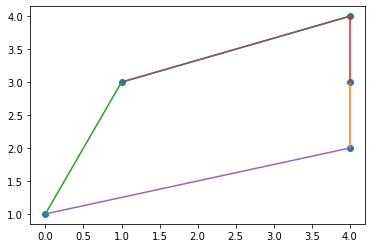

In [ ]:
ans=list(x.values())[-1]
plot_the_best(ans)
ans,x

##10 nodes


In [ ]:
n=10
model=RLnetwork(64,32,32,32,n)
#model=RLnetwork(5,10,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

In [ ]:
x=dict()
m=[]
coords=np.array([[0.96222682, 0.81789497],
       [0.01782511, 0.93226486],
       [0.3518051 , 0.82315222],
       [0.33063835, 0.57929051],
       [0.02360734, 0.4305754 ],
       [0.29650064, 0.28795597],
       [0.53866827, 0.23490321],
       [0.70254764, 0.60307924],
       [0.71190645, 0.15977665],
       [0.36290907, 0.12392136]])

dist_mat=np.array([[0.        , 0.95130178, 0.61044436, 0.67515633, 1.01539302,
        0.85089758, 0.72061171, 0.33701494, 0.70411647, 0.91694118],
       [0.95130178, 0.        , 0.35135197, 0.47163865, 0.50172278,
        0.70199288, 0.87039697, 0.75974214, 1.03850227, 0.87892102],
       [0.61044436, 0.35135197, 0.        , 0.2447786 , 0.51169359,
        0.5380461 , 0.61721531, 0.41406816, 0.75481132, 0.69931902],
       [0.67515633, 0.47163865, 0.2447786 , 0.        , 0.34115133,
        0.29332781, 0.40234197, 0.37266932, 0.5668838 , 0.45651119],
       [1.01539302, 0.50172278, 0.51169359, 0.34115133, 0.        ,
        0.30791404, 0.55097675, 0.70051232, 0.73965373, 0.45734272],
       [0.85089758, 0.70199288, 0.5380461 , 0.29332781, 0.30791404,
        0.        , 0.24791079, 0.51398137, 0.43473202, 0.17696732],
       [0.72061171, 0.87039697, 0.61721531, 0.40234197, 0.55097675,
        0.24791079, 0.        , 0.40300129, 0.18882655, 0.20786599],
       [0.33701494, 0.75974214, 0.41406816, 0.37266932, 0.70051232,
        0.51398137, 0.40300129, 0.        , 0.44340137, 0.58732158],
       [0.70411647, 1.03850227, 0.75481132, 0.5668838 , 0.73965373,
        0.43473202, 0.18882655, 0.44340137, 0.        , 0.3508344 ],
       [0.91694118, 0.87892102, 0.69931902, 0.45651119, 0.45734272,
        0.17696732, 0.20786599, 0.58732158, 0.3508344 , 0.        ]])
dist_mat=-dist_mat

episode number 0 total distance 5.21372076
episode number 1 total distance 5.10976228
episode number 2 total distance 5.57724357
episode number 3 total distance 5.9634233100000005
episode number 4 total distance 5.51322128
episode number 5 total distance 6.10931621
episode number 6 total distance 6.178799260000001
episode number 7 total distance 4.90029205
episode number 8 total distance 5.31110892
episode number 9 total distance 5.31823131
episode number 10 total distance 5.39131769
episode number 11 total distance 4.51765146
episode number 12 total distance 5.817132610000002
episode number 13 total distance 5.00045258
episode number 14 total distance 4.19812428
episode number 15 total distance 6.49999071
episode number 16 total distance 5.4341346999999995
episode number 17 total distance 5.95633253
episode number 18 total distance 5.044708770000001
episode number 19 total distance 5.18488927
episode number 20 total distance 6.10776302
episode number 21 total distance 5.4374766
episod

3.71144564

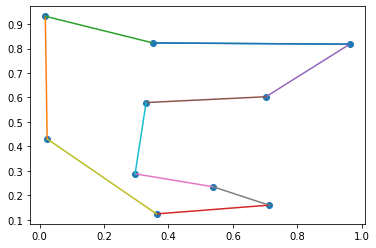

In [ ]:
epsilon=1.
e=1000
for episode in range(e):
  state=0
  path=[state]
  q_s_a_loss=[]
  target_loss=[]

  for i in range(n-1):
    action_prob=model(torch.FloatTensor([state]))
    if epsilon > random.random():      
      q_s_a=random.choice(action_prob)
      action=action_prob.tolist().index(q_s_a)
      while action in path:
        q_s_a=random.choice(action_prob)
        action=action_prob.tolist().index(q_s_a)
      #print('action explore',action)         
    else:
      sorted_prob=action_prob.argsort(descending=True)
      #print('action_prob',action_prob,'sorted_prob',sorted_prob)
      for i in sorted_prob:
        if i not in path:
          action=i
          q_s_a=action_prob[i]          
          #print('action exploit',action)
          #print('Q(',state,',',int(i),')','=',float(action_prob[i]))
          break
    q_s_a_loss.append(q_s_a)
    
    next_action_prob=model(torch.FloatTensor([action]))
    sorted_prob=next_action_prob.argsort(descending=True)
    #print('next_action_prob',next_action_prob,'sorted_prob',sorted_prob)
    target=dist_mat[state,action]+0.9*next_action_prob[sorted_prob[0]]
    target_loss.append(target)

    
    #print('Q(',int(action),',',int(i),')','=',float(next_action_prob[i]))
    


    path.append(int(action))
    state=int(action)

  qloss=torch.stack(q_s_a_loss).sum()
  tloss=torch.stack(target_loss).sum()
  loss=F.mse_loss(qloss,tloss)
  loss.backward()
  #torch.autograd.set_detect_anomaly(True)
  optimizer.step()
  lr_scheduler.step()
  optimizer.zero_grad()

  epsilon=1-episode/e
  path.append(path[0])
  total_dist=0
  for i in range(len(path)-1):
    total_dist+=dist_mat[path[i],path[i+1]]
  print('episode number {} total distance {}'.format(episode,-total_dist))
  if episode==0:
    x[-total_dist]=path
    m.append(-total_dist)
  if episode>0:
    if -total_dist<m[-1]:
      x[-total_dist]=path
      m.append(-total_dist)


distance,path=list(x.keys())[-1],list(x.values())[-1]
plot_the_best(path)
distance
  
  
  

##20 nodes

In [ ]:
n=20
model=RLnetwork(64,32,32,32,n)
#model=RLnetwork(5,10,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

In [ ]:
x=dict()
m=[]
coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[-0.        , -0.60001635, -0.69288158, -0.57828654, -0.19026258,
        -0.74614952, -0.18085482, -0.31029269, -0.3314574 , -0.79518088,
        -0.69595595, -0.11921825, -0.20112521, -0.68394958, -0.94464125,
        -0.4404823 , -0.48896882, -0.63981237, -0.62148559, -0.06305272],
       [-0.60001635, -0.        , -0.6096485 , -0.54643148, -0.57611814,
        -0.2801591 , -0.74710006, -0.66153736, -0.43257423, -0.5363238 ,
        -0.2936458 , -0.5286757 , -0.50420209, -0.57504916, -0.34629786,
        -0.59903565, -0.68129507, -0.14390819, -0.69684521, -0.5574272 ],
       [-0.69288158, -0.6096485 , -0.        , -0.11472279, -0.5152005 ,
        -0.43726687, -0.69741322, -0.45760971, -0.82029961, -0.20019115,
        -0.37011518, -0.73140247, -0.49214671, -0.03700231, -0.82736361,
        -0.280085  , -0.29420794, -0.48979777, -0.17340941, -0.63098083],
       [-0.57828654, -0.54643148, -0.11472279, -0.        , -0.40229003,
        -0.42563941, -0.58895042, -0.35501951, -0.71433719, -0.26453563,
        -0.3530685 , -0.61758619, -0.37745903, -0.10916506, -0.80293554,
        -0.17962112, -0.21741289, -0.44426651, -0.1555766 , -0.51630174],
       [-0.19026258, -0.57611814, -0.5152005 , -0.40229003, -0.        ,
        -0.64985727, -0.20233598, -0.13289996, -0.45378969, -0.64016338,
        -0.58843568, -0.27307583, -0.07191649, -0.5107664 , -0.91813886,
        -0.25165433, -0.29915086, -0.57173305, -0.43192382, -0.13808814],
       [-0.74614952, -0.2801591 , -0.43726687, -0.42563941, -0.64985727,
        -0.        , -0.84890351, -0.68464087, -0.67800129, -0.29566197,
        -0.07305885, -0.71240533, -0.58566454, -0.40039258, -0.39123464,
        -0.55569503, -0.6237957 , -0.14162712, -0.57799997, -0.68935477],
       [-0.18085482, -0.74710006, -0.69741322, -0.58895042, -0.20233598,
        -0.84890351, -0.        , -0.24641672, -0.51197429, -0.83749015,
        -0.78924013, -0.29933824, -0.26325144, -0.69806256, -1.09326217,
        -0.41921273, -0.43747985, -0.76213478, -0.5852434 , -0.19605849],
       [-0.31029269, -0.66153736, -0.45760971, -0.35501951, -0.13289996,
        -0.68464087, -0.24641672, -0.        , -0.58591801, -0.61481798,
        -0.61647621, -0.40423899, -0.18378021, -0.46245904, -0.99282405,
        -0.1775649 , -0.19217537, -0.6310855 , -0.33891272, -0.26668711],
       [-0.3314574 , -0.43257423, -0.82029961, -0.71433719, -0.45378969,
        -0.67800129, -0.51197429, -0.58591801, -0.        , -0.84582561,
        -0.65771907, -0.21265702, -0.40923866, -0.79759615, -0.7332192 ,
        -0.64659318, -0.71959818, -0.53979921, -0.81561159, -0.33733856],
       [-0.79518088, -0.5363238 , -0.20019115, -0.26453563, -0.64016338,
        -0.29566197, -0.83749015, -0.61481798, -0.84582561, -0.        ,
        -0.24827655, -0.80598355, -0.59838216, -0.17315241, -0.67977252,
        -0.44309958, -0.47858707, -0.39595434, -0.37286812, -0.73221293],
       [-0.69595595, -0.2936458 , -0.37011518, -0.3530685 , -0.58843568,
        -0.07305885, -0.78924013, -0.61647621, -0.65771907, -0.24827655,
        -0.        , -0.67154895, -0.52668963, -0.33311421, -0.45741009,
        -0.48358187, -0.55093118, -0.15021474, -0.50612738, -0.63725743],
       [-0.11921825, -0.5286757 , -0.73140247, -0.61758619, -0.27307583,
        -0.71240533, -0.29933824, -0.40423899, -0.21265702, -0.80598355,
        -0.67154895, -0.        , -0.25299983, -0.71682005, -0.86599412,
        -0.50566234, -0.5661908 , -0.59196952, -0.6857113 , -0.13849416],
       [-0.20112521, -0.50420209, -0.49214671, -0.37745903, -0.07191649,
        -0.58566454, -0.26325144, -0.18378021, -0.40923866, -0.59838216,
        -0.52668963, -0.25299983, -0.        , -0.48282438, -0.84642083,
        -0.25266693, -0.31600766, -0.50232732, -0.43292366, -0.13884631],
       [-0.68394958, -0.57504916, -0.03700231, -0.10916506, -0.5107664 ,
        -0.40039258, -0.69806256, -0.46245904, -0.79759615, -0.17315241,
        -0.33311421, -0.71682005, -0.48282438, -0.        , -0.79037877,
        -0.28546752, -0.30945139, -0.45363729, -0.20068363, -0.62148642],
       [-0.94464125, -0.34629786, -0.82736361, -0.80293554, -0.91813886,
        -0.39123464, -1.09326217, -0.99282405, -0.7332192 , -0.67977252,
        -0.45741009, -0.86599412, -0.84642083, -0.79037877, -0.        ,
        -0.90237746, -0.97968778, -0.3692403 , -0.9582732 , -0.90352714],
       [-0.4404823 , -0.59903565, -0.280085  , -0.17962112, -0.25165433,
        -0.55569503, -0.41921273, -0.1775649 , -0.64659318, -0.44309958,
        -0.48358187, -0.50566234, -0.25266693, -0.28546752, -0.90237746,
        -0.        , -0.08333794, -0.53313762, -0.18134226, -0.38327394],
       [-0.48896882, -0.68129507, -0.29420794, -0.21741289, -0.29915086,
        -0.6237957 , -0.43747985, -0.19217537, -0.71959818, -0.47858707,
        -0.55093118, -0.5661908 , -0.31600766, -0.30945139, -0.97968778,
        -0.08333794, -0.        , -0.610796  , -0.14934068, -0.43642365],
       [-0.63981237, -0.14390819, -0.48979777, -0.44426651, -0.57173305,
        -0.14162712, -0.76213478, -0.6310855 , -0.53979921, -0.39595434,
        -0.15021474, -0.59196952, -0.50232732, -0.45363729, -0.3692403 ,
        -0.53313762, -0.610796  , -0.        , -0.5994127 , -0.58756916],
       [-0.62148559, -0.69684521, -0.17340941, -0.1555766 , -0.43192382,
        -0.57799997, -0.5852434 , -0.33891272, -0.81561159, -0.37286812,
        -0.50612738, -0.6857113 , -0.43292366, -0.20068363, -0.9582732 ,
        -0.18134226, -0.14934068, -0.5994127 , -0.        , -0.56461214],
       [-0.06305272, -0.5574272 , -0.63098083, -0.51630174, -0.13808814,
        -0.68935477, -0.19605849, -0.26668711, -0.33733856, -0.73221293,
        -0.63725743, -0.13849416, -0.13884631, -0.62148642, -0.90352714,
        -0.38327394, -0.43642365, -0.58756916, -0.56461214, -0.        ]])

Streaming output truncated to the last 5000 lines.
episode number 3000 total distance 11.79741568
episode number 3001 total distance 10.0821885
episode number 3002 total distance 10.850848189999999
episode number 3003 total distance 10.874465009999998
episode number 3004 total distance 10.575179030000001
episode number 3005 total distance 10.411337109999998
episode number 3006 total distance 9.51838862
episode number 3007 total distance 10.52966604
episode number 3008 total distance 10.684405449999998
episode number 3009 total distance 10.502072499999999
episode number 3010 total distance 11.82394113
episode number 3011 total distance 9.606188059999997
episode number 3012 total distance 10.39671776
episode number 3013 total distance 10.721499669999998
episode number 3014 total distance 10.32678183
episode number 3015 total distance 9.37358755
episode number 3016 total distance 9.93617444
episode number 3017 total distance 9.58021729
episode number 3018 total distance 8.879188820000001


6.63806735

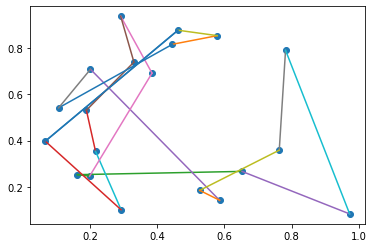

In [ ]:
epsilon=1.
e=8000
for episode in range(e):
  state=0
  path=[state]
  q_s_a_loss=[]
  target_loss=[]

  for i in range(n-1):
    action_prob=model(torch.FloatTensor([state]))
    if epsilon > random.random():      
      q_s_a=random.choice(action_prob)
      action=action_prob.tolist().index(q_s_a)
      while action in path:
        q_s_a=random.choice(action_prob)
        action=action_prob.tolist().index(q_s_a)
      #print('action explore',action)         
    else:
      sorted_prob=action_prob.argsort(descending=True)
      #print('action_prob',action_prob,'sorted_prob',sorted_prob)
      for i in sorted_prob:
        if i not in path:
          action=i
          q_s_a=action_prob[i]          
          #print('action exploit',action)
          #print('Q(',state,',',int(i),')','=',float(action_prob[i]))
          break
    q_s_a_loss.append(q_s_a)
    
    next_action_prob=model(torch.FloatTensor([action]))
    sorted_prob=next_action_prob.argsort(descending=True)
    #print('next_action_prob',next_action_prob,'sorted_prob',sorted_prob)
    target=dist_mat[state,action]+0.9*next_action_prob[sorted_prob[0]]
    target_loss.append(target)

    
    #print('Q(',int(action),',',int(i),')','=',float(next_action_prob[i]))
    


    path.append(int(action))
    state=int(action)

  qloss=torch.stack(q_s_a_loss).sum()
  tloss=torch.stack(target_loss).sum()
  loss=F.mse_loss(qloss,tloss)
  loss.backward()
  #torch.autograd.set_detect_anomaly(True)
  optimizer.step()
  lr_scheduler.step()
  optimizer.zero_grad()

  epsilon=1-episode/e
  path.append(path[0])
  total_dist=0
  for i in range(len(path)-1):
    total_dist+=dist_mat[path[i],path[i+1]]
  print('episode number {} total distance {}'.format(episode,-total_dist))
  if episode==0:
    x[-total_dist]=path
    m.append(-total_dist)
  if episode>0:
    if -total_dist<m[-1]:
      x[-total_dist]=path
      m.append(-total_dist)


distance,path=list(x.keys())[-1],list(x.values())[-1]
plot_the_best(path)
distance
  
  
  

#DQN using tensors

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from torchsummary import summary
import random

In [ ]:
SEED=1
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
def tensor(ans):
  xv=[]
  for i in range(n):
    if i not in ans:
      xv.append([0,coords[i,0],coords[i,1]])
    else:
      xv.append([1,coords[i,0],coords[i,1]])
  xv=torch.FloatTensor(xv)
  xv=xv.unsqueeze(0)  
  return (xv)

In [ ]:

class RLnetwork(nn.Module):
  def __init__(self,hidden1_size,hidden2_size,hidden3_size,hidden4_size,n):
    super().__init__()
    self.layer1=nn.Linear(3,hidden1_size)
    self.hidden1=nn.Linear(hidden1_size,hidden2_size)
    self.hidden2=nn.Linear(hidden2_size,hidden3_size)
    self.hidden3=nn.Linear(hidden3_size,hidden4_size)
    self.hidden4=nn.Linear(hidden4_size,hidden4_size)
    self.out=nn.Linear(hidden4_size,n)

  def forward(self,state):
    layer1=self.layer1(state)
    layer2=F.relu(self.hidden1(layer1))
    layer3=F.relu(self.hidden2(layer2))
    layer4=F.relu(self.hidden3(layer3))
    layer5=F.relu(self.hidden4(layer4))
    output=self.out(layer5)
    return output.sum(dim=1).squeeze(dim=0)


In [ ]:
def find_the_best(e):
  loss=0
  epsilon=1.
  
  for episode in range(e):
    state=0
    path=[state]
    
    for i in range(n-1):
      if epsilon > random.random():
        action_prob=model(tensor(path))
        q_s_a=random.choice(action_prob)
        action=action_prob.tolist().index(q_s_a)
        while action in path:
          q_s_a=random.choice(action_prob)
          action=action_prob.tolist().index(q_s_a)
      else:
        action_prob=model(tensor(path))
        sorted_prob=action_prob.argsort(descending=True)
        for i in sorted_prob:
          if i not in path:
            action=i
            q_s_a=action_prob[i]
            break
      
      next_action_prob=model(tensor([action]))
      sorted_prob=next_action_prob.argsort(descending=True)
      target=dist_mat[state,action]+0.9*next_action_prob[sorted_prob[0]]

      

      loss=F.mse_loss(q_s_a,target)
      loss.backward(retain_graph=True)
      torch.autograd.set_detect_anomaly(True)
      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      path.append(int(action))
      state=int(action)

    epsilon=1-episode/e
    path.append(path[0])
    total_dist=0
    for i in range(len(path)-1):
      total_dist+=dist_mat[path[i],path[i+1]]
    print('episode number {} total distance {}'.format(episode,-total_dist))

    if episode==0:
      x[-total_dist]=path
      m.append(-total_dist)
    if episode>0:
      if -total_dist<m[-1]:
        x[-total_dist]=path
        m.append(-total_dist)
    #path=list(x.values())[-1]
    #plot_the_best(ans)  
  
  
  #return(path,total_dist)

In [ ]:

def plot_the_best(ans):
  plt.scatter(coords[:,0],coords[:,1])
  for i in ans:
    plt.plot([coords[ans[i],0],coords[ans[i+1],0]],[coords[ans[i],1],coords[ans[i+1],1]])

##5 nodes

In [ ]:
#5 nodes
n=5
model=RLnetwork(64,32,32,32,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

episode number 0 total distance 16.285383290000002
episode number 1 total distance 12.359173610000001
episode number 2 total distance 12.87048159
episode number 3 total distance 12.87048159
episode number 4 total distance 15.919796900000001
episode number 5 total distance 16.75751924
episode number 6 total distance 11.52145127
episode number 7 total distance 12.87048159
episode number 8 total distance 16.285383290000002
episode number 9 total distance 16.75751924
episode number 10 total distance 12.359173610000001
episode number 11 total distance 11.52145127
episode number 12 total distance 13.23606798
episode number 13 total distance 16.285383290000002
episode number 14 total distance 13.23606798
episode number 15 total distance 16.285383290000002
episode number 16 total distance 17.63441361
episode number 17 total distance 15.919796900000001
episode number 18 total distance 12.39834564
episode number 19 total distance 16.285383290000002
episode number 20 total distance 15.91979690000

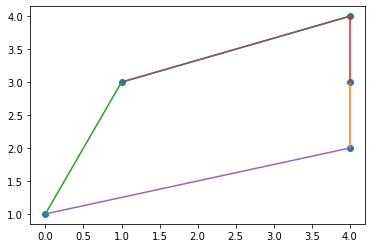

In [ ]:
global x,m
x=dict()
m=[]
n=5
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])
dist_mat*=-1



find_the_best(1000)

ans=list(x.values())[-1]
plot_the_best(ans)

##10 nodes

In [ ]:
#10 nodes
n=10
model=RLnetwork(64,32,32,32,n)
#model=RLnetwork(5,10,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

episode number 0 total distance 5.21372076
episode number 1 total distance 5.10976228
episode number 2 total distance 5.57724357
episode number 3 total distance 5.9634233100000005
episode number 4 total distance 5.51322128
episode number 5 total distance 6.10931621
episode number 6 total distance 6.178799260000001
episode number 7 total distance 4.90029205
episode number 8 total distance 5.31110892
episode number 9 total distance 5.31823131
episode number 10 total distance 5.39131769
episode number 11 total distance 4.51765146
episode number 12 total distance 5.817132610000002
episode number 13 total distance 5.00045258
episode number 14 total distance 4.19812428
episode number 15 total distance 6.49999071
episode number 16 total distance 5.4341346999999995
episode number 17 total distance 5.95633253
episode number 18 total distance 5.044708770000001
episode number 19 total distance 4.272308820000001
episode number 20 total distance 5.54661209
episode number 21 total distance 5.1698117

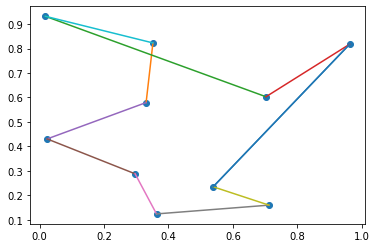

In [ ]:
global x,m
m=[]
x=dict()
coords=np.array([[0.96222682, 0.81789497],
       [0.01782511, 0.93226486],
       [0.3518051 , 0.82315222],
       [0.33063835, 0.57929051],
       [0.02360734, 0.4305754 ],
       [0.29650064, 0.28795597],
       [0.53866827, 0.23490321],
       [0.70254764, 0.60307924],
       [0.71190645, 0.15977665],
       [0.36290907, 0.12392136]])

dist_mat=np.array([[-0.        , -0.95130178, -0.61044436, -0.67515633, -1.01539302,
        -0.85089758, -0.72061171, -0.33701494, -0.70411647, -0.91694118],
       [-0.95130178, -0.        , -0.35135197, -0.47163865, -0.50172278,
        -0.70199288, -0.87039697, -0.75974214, -1.03850227, -0.87892102],
       [-0.61044436, -0.35135197, -0.        , -0.2447786 , -0.51169359,
        -0.5380461 , -0.61721531, -0.41406816, -0.75481132, -0.69931902],
       [-0.67515633, -0.47163865, -0.2447786 , -0.        , -0.34115133,
        -0.29332781, -0.40234197, -0.37266932, -0.5668838 , -0.45651119],
       [-1.01539302, -0.50172278, -0.51169359, -0.34115133, -0.        ,
        -0.30791404, -0.55097675, -0.70051232, -0.73965373, -0.45734272],
       [-0.85089758, -0.70199288, -0.5380461 , -0.29332781, -0.30791404,
        -0.        , -0.24791079, -0.51398137, -0.43473202, -0.17696732],
       [-0.72061171, -0.87039697, -0.61721531, -0.40234197, -0.55097675,
        -0.24791079, -0.        , -0.40300129, -0.18882655, -0.20786599],
       [-0.33701494, -0.75974214, -0.41406816, -0.37266932, -0.70051232,
        -0.51398137, -0.40300129, -0.        , -0.44340137, -0.58732158],
       [-0.70411647, -1.03850227, -0.75481132, -0.5668838 , -0.73965373,
        -0.43473202, -0.18882655, -0.44340137, -0.        , -0.3508344 ],
       [-0.91694118, -0.87892102, -0.69931902, -0.45651119, -0.45734272,
        -0.17696732, -0.20786599, -0.58732158, -0.3508344 , -0.        ]])




find_the_best(4000)
ans=list(x.values())[-1]
plot_the_best(ans)
print('shortest distance',list(x)[-1])

##20 nodes

In [ ]:
#20 nodes
n=20
model=RLnetwork(64,32,32,32,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

episode number 0 total distance 9.94326553
episode number 1 total distance 9.539761359999998
episode number 2 total distance 10.06076837
episode number 3 total distance 9.64025801
episode number 4 total distance 9.72023364
episode number 5 total distance 10.025186799999998
episode number 6 total distance 10.94973815
episode number 7 total distance 8.84380062
episode number 8 total distance 9.660570969999998
episode number 9 total distance 9.930965070000001
episode number 10 total distance 9.934729080000002
episode number 11 total distance 11.334452649999996
episode number 12 total distance 10.2213285
episode number 13 total distance 9.52499175
episode number 14 total distance 10.02213463
episode number 15 total distance 10.470524450000001
episode number 16 total distance 9.348358420000002
episode number 17 total distance 8.24107074
episode number 18 total distance 9.79473262
episode number 19 total distance 8.22289072
episode number 20 total distance 8.14801302
episode number 21 total 

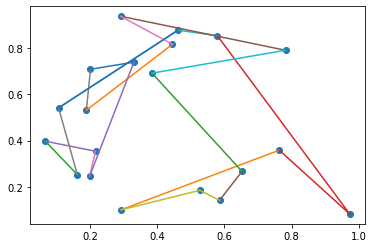

In [ ]:
global x,m
m=[]
x=dict()
coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[-0.        , -0.60001635, -0.69288158, -0.57828654, -0.19026258,
        -0.74614952, -0.18085482, -0.31029269, -0.3314574 , -0.79518088,
        -0.69595595, -0.11921825, -0.20112521, -0.68394958, -0.94464125,
        -0.4404823 , -0.48896882, -0.63981237, -0.62148559, -0.06305272],
       [-0.60001635, -0.        , -0.6096485 , -0.54643148, -0.57611814,
        -0.2801591 , -0.74710006, -0.66153736, -0.43257423, -0.5363238 ,
        -0.2936458 , -0.5286757 , -0.50420209, -0.57504916, -0.34629786,
        -0.59903565, -0.68129507, -0.14390819, -0.69684521, -0.5574272 ],
       [-0.69288158, -0.6096485 , -0.        , -0.11472279, -0.5152005 ,
        -0.43726687, -0.69741322, -0.45760971, -0.82029961, -0.20019115,
        -0.37011518, -0.73140247, -0.49214671, -0.03700231, -0.82736361,
        -0.280085  , -0.29420794, -0.48979777, -0.17340941, -0.63098083],
       [-0.57828654, -0.54643148, -0.11472279, -0.        , -0.40229003,
        -0.42563941, -0.58895042, -0.35501951, -0.71433719, -0.26453563,
        -0.3530685 , -0.61758619, -0.37745903, -0.10916506, -0.80293554,
        -0.17962112, -0.21741289, -0.44426651, -0.1555766 , -0.51630174],
       [-0.19026258, -0.57611814, -0.5152005 , -0.40229003, -0.        ,
        -0.64985727, -0.20233598, -0.13289996, -0.45378969, -0.64016338,
        -0.58843568, -0.27307583, -0.07191649, -0.5107664 , -0.91813886,
        -0.25165433, -0.29915086, -0.57173305, -0.43192382, -0.13808814],
       [-0.74614952, -0.2801591 , -0.43726687, -0.42563941, -0.64985727,
        -0.        , -0.84890351, -0.68464087, -0.67800129, -0.29566197,
        -0.07305885, -0.71240533, -0.58566454, -0.40039258, -0.39123464,
        -0.55569503, -0.6237957 , -0.14162712, -0.57799997, -0.68935477],
       [-0.18085482, -0.74710006, -0.69741322, -0.58895042, -0.20233598,
        -0.84890351, -0.        , -0.24641672, -0.51197429, -0.83749015,
        -0.78924013, -0.29933824, -0.26325144, -0.69806256, -1.09326217,
        -0.41921273, -0.43747985, -0.76213478, -0.5852434 , -0.19605849],
       [-0.31029269, -0.66153736, -0.45760971, -0.35501951, -0.13289996,
        -0.68464087, -0.24641672, -0.        , -0.58591801, -0.61481798,
        -0.61647621, -0.40423899, -0.18378021, -0.46245904, -0.99282405,
        -0.1775649 , -0.19217537, -0.6310855 , -0.33891272, -0.26668711],
       [-0.3314574 , -0.43257423, -0.82029961, -0.71433719, -0.45378969,
        -0.67800129, -0.51197429, -0.58591801, -0.        , -0.84582561,
        -0.65771907, -0.21265702, -0.40923866, -0.79759615, -0.7332192 ,
        -0.64659318, -0.71959818, -0.53979921, -0.81561159, -0.33733856],
       [-0.79518088, -0.5363238 , -0.20019115, -0.26453563, -0.64016338,
        -0.29566197, -0.83749015, -0.61481798, -0.84582561, -0.        ,
        -0.24827655, -0.80598355, -0.59838216, -0.17315241, -0.67977252,
        -0.44309958, -0.47858707, -0.39595434, -0.37286812, -0.73221293],
       [-0.69595595, -0.2936458 , -0.37011518, -0.3530685 , -0.58843568,
        -0.07305885, -0.78924013, -0.61647621, -0.65771907, -0.24827655,
        -0.        , -0.67154895, -0.52668963, -0.33311421, -0.45741009,
        -0.48358187, -0.55093118, -0.15021474, -0.50612738, -0.63725743],
       [-0.11921825, -0.5286757 , -0.73140247, -0.61758619, -0.27307583,
        -0.71240533, -0.29933824, -0.40423899, -0.21265702, -0.80598355,
        -0.67154895, -0.        , -0.25299983, -0.71682005, -0.86599412,
        -0.50566234, -0.5661908 , -0.59196952, -0.6857113 , -0.13849416],
       [-0.20112521, -0.50420209, -0.49214671, -0.37745903, -0.07191649,
        -0.58566454, -0.26325144, -0.18378021, -0.40923866, -0.59838216,
        -0.52668963, -0.25299983, -0.        , -0.48282438, -0.84642083,
        -0.25266693, -0.31600766, -0.50232732, -0.43292366, -0.13884631],
       [-0.68394958, -0.57504916, -0.03700231, -0.10916506, -0.5107664 ,
        -0.40039258, -0.69806256, -0.46245904, -0.79759615, -0.17315241,
        -0.33311421, -0.71682005, -0.48282438, -0.        , -0.79037877,
        -0.28546752, -0.30945139, -0.45363729, -0.20068363, -0.62148642],
       [-0.94464125, -0.34629786, -0.82736361, -0.80293554, -0.91813886,
        -0.39123464, -1.09326217, -0.99282405, -0.7332192 , -0.67977252,
        -0.45741009, -0.86599412, -0.84642083, -0.79037877, -0.        ,
        -0.90237746, -0.97968778, -0.3692403 , -0.9582732 , -0.90352714],
       [-0.4404823 , -0.59903565, -0.280085  , -0.17962112, -0.25165433,
        -0.55569503, -0.41921273, -0.1775649 , -0.64659318, -0.44309958,
        -0.48358187, -0.50566234, -0.25266693, -0.28546752, -0.90237746,
        -0.        , -0.08333794, -0.53313762, -0.18134226, -0.38327394],
       [-0.48896882, -0.68129507, -0.29420794, -0.21741289, -0.29915086,
        -0.6237957 , -0.43747985, -0.19217537, -0.71959818, -0.47858707,
        -0.55093118, -0.5661908 , -0.31600766, -0.30945139, -0.97968778,
        -0.08333794, -0.        , -0.610796  , -0.14934068, -0.43642365],
       [-0.63981237, -0.14390819, -0.48979777, -0.44426651, -0.57173305,
        -0.14162712, -0.76213478, -0.6310855 , -0.53979921, -0.39595434,
        -0.15021474, -0.59196952, -0.50232732, -0.45363729, -0.3692403 ,
        -0.53313762, -0.610796  , -0.        , -0.5994127 , -0.58756916],
       [-0.62148559, -0.69684521, -0.17340941, -0.1555766 , -0.43192382,
        -0.57799997, -0.5852434 , -0.33891272, -0.81561159, -0.37286812,
        -0.50612738, -0.6857113 , -0.43292366, -0.20068363, -0.9582732 ,
        -0.18134226, -0.14934068, -0.5994127 , -0.        , -0.56461214],
       [-0.06305272, -0.5574272 , -0.63098083, -0.51630174, -0.13808814,
        -0.68935477, -0.19605849, -0.26668711, -0.33733856, -0.73221293,
        -0.63725743, -0.13849416, -0.13884631, -0.62148642, -0.90352714,
        -0.38327394, -0.43642365, -0.58756916, -0.56461214, -0.        ]])


find_the_best(4000)

path=list(x.values())[-1]
plot_the_best(path)
print(list(x)[-1])

#Graph embedded DQN

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from torchsummary import summary
import random

In [ ]:
SEED=1
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
class RLnetwork(nn.Module):
  def __init__(self,T,e):
    super().__init__()
    self.T=T
    self.e=e
    self.theta1=nn.Linear(self.e,self.e)
    self.theta2=nn.Linear(self.e,self.e)
    self.theta3=nn.Linear(self.e,self.e)
    self.theta4=nn.Linear(1,self.e)
    self.theta5=nn.Linear(2*self.e,1)
    self.theta6=nn.Linear(self.e,self.e)
    self.theta7=nn.Linear(self.e,self.e)

  def forward(self,xv,W):
    n=xv.shape[1]
    e=xv.shape[2]

    s1=self.theta1(xv)
    
    mu=torch.zeros(1,n,e)
    adj=torch.where(W>0,torch.ones_like(W) ,torch.zeros_like(W))
    s2=self.theta2(adj.matmul(mu))

    s3=self.theta3( torch.sum( F.relu(self.theta4(W.unsqueeze(3))) , dim=1) )

    for i in range(self.T):
      mu=F.relu(s1+s2+s3)
      s2=self.theta2(adj.matmul(mu))

#q-values
    global_action=self.theta6(torch.sum(mu, dim=1, keepdim=True).repeat(1,n,1))
    local=self.theta7(mu)
    out=F.relu(torch.cat([global_action,local],dim=2))

    est_rew=self.theta5(out).squeeze(dim=2)
    return est_rew[0]




In [ ]:
def tensor(ans):
  xv=[]
  for i in range(n):
    if i not in ans:
      xv.append([0,coords[i,0],coords[i,1]])
    else:
      xv.append([1,coords[i,0],coords[i,1]])
  xv=torch.FloatTensor(xv)
  xv=xv.unsqueeze(0)  
  return (xv)
   

In [ ]:
def find_the_best(episodes):
  loss=0
  epsilon=1
  for episode in range(episodes):
    state=0
    path=[state]
    
    while len(path)<n:
      if epsilon > random.random():
        current_est_rew=model(tensor(path),dist_mat)
        q_value=random.choice(current_est_rew)
        action=current_est_rew.tolist().index(q_value)
        while action in path:
          q_value=random.choice(current_est_rew)
          action=current_est_rew.tolist().index(q_value)
      else:
        current_est_rew=model(tensor(path),dist_mat)
        sorted_est_rew=current_est_rew.argsort(descending=True)
        for action in sorted_est_rew:
          if action not in path:
            q_value=current_est_rew[action]
            break
      
      next_est_rew=model(tensor(path),dist_mat)
      sorted_est_rew=next_est_rew.argsort(descending=True)
      target=dist_mat[0,state,action] + 0.9*next_est_rew[sorted_est_rew[0]]
      
      path.append(int(action))
      state=action

      loss=F.mse_loss(q_value,target)
      loss.backward(retain_graph=True)
      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()

    epsilon=1-episode/episodes
    path.append(path[0])
    total_dist=0
    for i in range(len(path)-1):
      total_dist+=dist_mat[0,path[i],path[i+1]]
    print('episode number {} total distance {}'.format(episode,-total_dist))

    if episode==0:
      x[-total_dist]=path
      m.append(-total_dist)
    if episode>0:
      if -total_dist<m[-1]:
        x[-total_dist]=path
        m.append(-total_dist)
    #ans=list(x.values())[-1]
    #plot_the_best(ans)  


In [ ]:

def plot_the_best(path):
  plt.scatter(coords[:,0],coords[:,1])
  for i in path:
    plt.plot([coords[path[i],0],coords[path[i+1],0]],[coords[path[i],1],coords[path[i+1],1]])

##4 nodes

In [ ]:
n=4
#model=RLnetwork(64,32,32,32,n)
model=RLnetwork(1,3)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

episode number 0 total distance 1.2031006813049316
episode number 1 total distance 1.1018013954162598
episode number 2 total distance 1.2031006813049316
episode number 3 total distance 1.1018013954162598
episode number 4 total distance 1.2031006813049316
episode number 5 total distance 1.2031006813049316
episode number 6 total distance 1.4628957509994507
episode number 7 total distance 1.4628957509994507
episode number 8 total distance 1.4628957509994507
episode number 9 total distance 1.2031006813049316
episode number 10 total distance 1.2031006813049316
episode number 11 total distance 1.4628957509994507
episode number 12 total distance 1.4628957509994507
episode number 13 total distance 1.1018013954162598
episode number 14 total distance 1.4628957509994507
episode number 15 total distance 1.2031006813049316
episode number 16 total distance 1.1018013954162598
episode number 17 total distance 1.4628957509994507
episode number 18 total distance 1.4628957509994507
episode number 19 tota

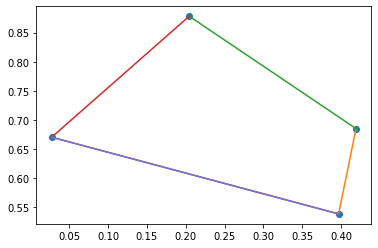

In [ ]:
global x,m
x=dict()
m=[]
coords=np.array([[0.39676747, 0.53881673],
        [0.41919451, 0.6852195 ],
        [0.20445225, 0.87811744],
        [0.02738759, 0.67046751]])
dist_mat=np. array([[0.        , 0.14811057, 0.39001296, 0.39213955],
        [0.14811057, 0.        , 0.28865872, 0.39208454],
        [0.39001296, 0.28865872, 0.        , 0.27289262],
        [0.39213955, 0.39208454, 0.27289262, 0.        ]])
dist_mat*=-1
dist_mat= torch.FloatTensor(dist_mat)
dist_mat=dist_mat.unsqueeze(0)



find_the_best(1000)

path=list(x.values())[-1]
plot_the_best(path)
print('shortest distance',list(x)[-1])

##5 nodes

In [ ]:
n=5
#model=RLnetwork(64,32,32,32,n)
model=RLnetwork(1,3)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

episode number 0 total distance 16.285383224487305
episode number 1 total distance 12.359173774719238
episode number 2 total distance 12.870481491088867
episode number 3 total distance 12.870481491088867
episode number 4 total distance 15.919795989990234
episode number 5 total distance 16.757518768310547
episode number 6 total distance 11.521450996398926
episode number 7 total distance 12.870481491088867
episode number 8 total distance 16.285383224487305
episode number 9 total distance 16.757518768310547
episode number 10 total distance 12.359173774719238
episode number 11 total distance 11.521450996398926
episode number 12 total distance 13.236067771911621
episode number 13 total distance 16.285383224487305
episode number 14 total distance 13.236067771911621
episode number 15 total distance 16.285383224487305
episode number 16 total distance 17.63441276550293
episode number 17 total distance 15.919795989990234
episode number 18 total distance 12.398344993591309
episode number 19 total

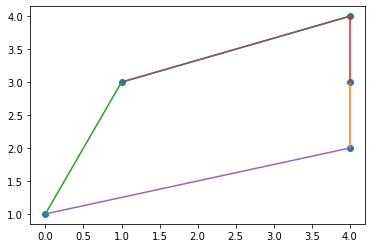

In [ ]:
global x,m
x=dict()
m=[]
n=5
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])
dist_mat= torch.FloatTensor(dist_mat)
dist_mat=dist_mat.unsqueeze(0)
dist_mat*=-1



find_the_best(1000)

path=list(x.values())[-1]
plot_the_best(path)

##10 nodes

In [ ]:
n=10
model=RLnetwork(1,3)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

episode number 0 total distance 5.172298431396484
episode number 1 total distance 6.009044647216797
episode number 2 total distance 5.50821590423584
episode number 3 total distance 5.038840293884277
episode number 4 total distance 5.3777756690979
episode number 5 total distance 4.7909722328186035
episode number 6 total distance 5.553734302520752
episode number 7 total distance 4.5529584884643555
episode number 8 total distance 6.017232418060303
episode number 9 total distance 5.876570701599121
episode number 10 total distance 5.181213855743408
episode number 11 total distance 5.101393222808838
episode number 12 total distance 5.954442977905273
episode number 13 total distance 5.595166206359863
episode number 14 total distance 4.982482433319092
episode number 15 total distance 5.034014701843262
episode number 16 total distance 5.3049163818359375
episode number 17 total distance 5.941352844238281
episode number 18 total distance 6.464287281036377
episode number 19 total distance 4.821123

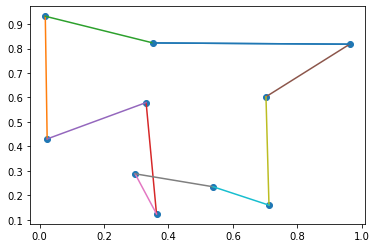

In [ ]:
global x,m
x=dict()
m=[]
coords=np.array([[0.96222682, 0.81789497],
       [0.01782511, 0.93226486],
       [0.3518051 , 0.82315222],
       [0.33063835, 0.57929051],
       [0.02360734, 0.4305754 ],
       [0.29650064, 0.28795597],
       [0.53866827, 0.23490321],
       [0.70254764, 0.60307924],
       [0.71190645, 0.15977665],
       [0.36290907, 0.12392136]])

dist_mat=np.array([[-0.        , -0.95130178, -0.61044436, -0.67515633, -1.01539302,
        -0.85089758, -0.72061171, -0.33701494, -0.70411647, -0.91694118],
       [-0.95130178, -0.        , -0.35135197, -0.47163865, -0.50172278,
        -0.70199288, -0.87039697, -0.75974214, -1.03850227, -0.87892102],
       [-0.61044436, -0.35135197, -0.        , -0.2447786 , -0.51169359,
        -0.5380461 , -0.61721531, -0.41406816, -0.75481132, -0.69931902],
       [-0.67515633, -0.47163865, -0.2447786 , -0.        , -0.34115133,
        -0.29332781, -0.40234197, -0.37266932, -0.5668838 , -0.45651119],
       [-1.01539302, -0.50172278, -0.51169359, -0.34115133, -0.        ,
        -0.30791404, -0.55097675, -0.70051232, -0.73965373, -0.45734272],
       [-0.85089758, -0.70199288, -0.5380461 , -0.29332781, -0.30791404,
        -0.        , -0.24791079, -0.51398137, -0.43473202, -0.17696732],
       [-0.72061171, -0.87039697, -0.61721531, -0.40234197, -0.55097675,
        -0.24791079, -0.        , -0.40300129, -0.18882655, -0.20786599],
       [-0.33701494, -0.75974214, -0.41406816, -0.37266932, -0.70051232,
        -0.51398137, -0.40300129, -0.        , -0.44340137, -0.58732158],
       [-0.70411647, -1.03850227, -0.75481132, -0.5668838 , -0.73965373,
        -0.43473202, -0.18882655, -0.44340137, -0.        , -0.3508344 ],
       [-0.91694118, -0.87892102, -0.69931902, -0.45651119, -0.45734272,
        -0.17696732, -0.20786599, -0.58732158, -0.3508344 , -0.        ]])
dist_mat= torch.FloatTensor(dist_mat)
dist_mat=dist_mat.unsqueeze(0)



find_the_best(4000)

path=list(x.values())[-1]
plot_the_best(path)
print('shortest distance',list(x)[-1])

##20 nodes

In [ ]:
#20 nodes
n=20
model=RLnetwork(1,3)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

Streaming output truncated to the last 5000 lines.
episode number 3001 total distance 10.207924842834473
episode number 3002 total distance 7.969138145446777
episode number 3003 total distance 10.294953346252441
episode number 3004 total distance 10.21359634399414
episode number 3005 total distance 10.715676307678223
episode number 3006 total distance 10.731660842895508
episode number 3007 total distance 10.295011520385742
episode number 3008 total distance 9.446859359741211
episode number 3009 total distance 10.306200981140137
episode number 3010 total distance 10.92512035369873
episode number 3011 total distance 11.473143577575684
episode number 3012 total distance 12.003142356872559
episode number 3013 total distance 9.770946502685547
episode number 3014 total distance 9.458879470825195
episode number 3015 total distance 9.334309577941895
episode number 3016 total distance 9.110621452331543
episode number 3017 total distance 10.24966049194336
episode number 3018 total distance 10.82

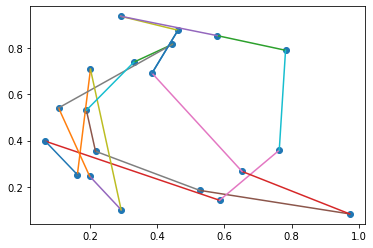

In [ ]:
global x,m
x=dict()
m=[]
coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[-0.        , -0.60001635, -0.69288158, -0.57828654, -0.19026258,
        -0.74614952, -0.18085482, -0.31029269, -0.3314574 , -0.79518088,
        -0.69595595, -0.11921825, -0.20112521, -0.68394958, -0.94464125,
        -0.4404823 , -0.48896882, -0.63981237, -0.62148559, -0.06305272],
       [-0.60001635, -0.        , -0.6096485 , -0.54643148, -0.57611814,
        -0.2801591 , -0.74710006, -0.66153736, -0.43257423, -0.5363238 ,
        -0.2936458 , -0.5286757 , -0.50420209, -0.57504916, -0.34629786,
        -0.59903565, -0.68129507, -0.14390819, -0.69684521, -0.5574272 ],
       [-0.69288158, -0.6096485 , -0.        , -0.11472279, -0.5152005 ,
        -0.43726687, -0.69741322, -0.45760971, -0.82029961, -0.20019115,
        -0.37011518, -0.73140247, -0.49214671, -0.03700231, -0.82736361,
        -0.280085  , -0.29420794, -0.48979777, -0.17340941, -0.63098083],
       [-0.57828654, -0.54643148, -0.11472279, -0.        , -0.40229003,
        -0.42563941, -0.58895042, -0.35501951, -0.71433719, -0.26453563,
        -0.3530685 , -0.61758619, -0.37745903, -0.10916506, -0.80293554,
        -0.17962112, -0.21741289, -0.44426651, -0.1555766 , -0.51630174],
       [-0.19026258, -0.57611814, -0.5152005 , -0.40229003, -0.        ,
        -0.64985727, -0.20233598, -0.13289996, -0.45378969, -0.64016338,
        -0.58843568, -0.27307583, -0.07191649, -0.5107664 , -0.91813886,
        -0.25165433, -0.29915086, -0.57173305, -0.43192382, -0.13808814],
       [-0.74614952, -0.2801591 , -0.43726687, -0.42563941, -0.64985727,
        -0.        , -0.84890351, -0.68464087, -0.67800129, -0.29566197,
        -0.07305885, -0.71240533, -0.58566454, -0.40039258, -0.39123464,
        -0.55569503, -0.6237957 , -0.14162712, -0.57799997, -0.68935477],
       [-0.18085482, -0.74710006, -0.69741322, -0.58895042, -0.20233598,
        -0.84890351, -0.        , -0.24641672, -0.51197429, -0.83749015,
        -0.78924013, -0.29933824, -0.26325144, -0.69806256, -1.09326217,
        -0.41921273, -0.43747985, -0.76213478, -0.5852434 , -0.19605849],
       [-0.31029269, -0.66153736, -0.45760971, -0.35501951, -0.13289996,
        -0.68464087, -0.24641672, -0.        , -0.58591801, -0.61481798,
        -0.61647621, -0.40423899, -0.18378021, -0.46245904, -0.99282405,
        -0.1775649 , -0.19217537, -0.6310855 , -0.33891272, -0.26668711],
       [-0.3314574 , -0.43257423, -0.82029961, -0.71433719, -0.45378969,
        -0.67800129, -0.51197429, -0.58591801, -0.        , -0.84582561,
        -0.65771907, -0.21265702, -0.40923866, -0.79759615, -0.7332192 ,
        -0.64659318, -0.71959818, -0.53979921, -0.81561159, -0.33733856],
       [-0.79518088, -0.5363238 , -0.20019115, -0.26453563, -0.64016338,
        -0.29566197, -0.83749015, -0.61481798, -0.84582561, -0.        ,
        -0.24827655, -0.80598355, -0.59838216, -0.17315241, -0.67977252,
        -0.44309958, -0.47858707, -0.39595434, -0.37286812, -0.73221293],
       [-0.69595595, -0.2936458 , -0.37011518, -0.3530685 , -0.58843568,
        -0.07305885, -0.78924013, -0.61647621, -0.65771907, -0.24827655,
        -0.        , -0.67154895, -0.52668963, -0.33311421, -0.45741009,
        -0.48358187, -0.55093118, -0.15021474, -0.50612738, -0.63725743],
       [-0.11921825, -0.5286757 , -0.73140247, -0.61758619, -0.27307583,
        -0.71240533, -0.29933824, -0.40423899, -0.21265702, -0.80598355,
        -0.67154895, -0.        , -0.25299983, -0.71682005, -0.86599412,
        -0.50566234, -0.5661908 , -0.59196952, -0.6857113 , -0.13849416],
       [-0.20112521, -0.50420209, -0.49214671, -0.37745903, -0.07191649,
        -0.58566454, -0.26325144, -0.18378021, -0.40923866, -0.59838216,
        -0.52668963, -0.25299983, -0.        , -0.48282438, -0.84642083,
        -0.25266693, -0.31600766, -0.50232732, -0.43292366, -0.13884631],
       [-0.68394958, -0.57504916, -0.03700231, -0.10916506, -0.5107664 ,
        -0.40039258, -0.69806256, -0.46245904, -0.79759615, -0.17315241,
        -0.33311421, -0.71682005, -0.48282438, -0.        , -0.79037877,
        -0.28546752, -0.30945139, -0.45363729, -0.20068363, -0.62148642],
       [-0.94464125, -0.34629786, -0.82736361, -0.80293554, -0.91813886,
        -0.39123464, -1.09326217, -0.99282405, -0.7332192 , -0.67977252,
        -0.45741009, -0.86599412, -0.84642083, -0.79037877, -0.        ,
        -0.90237746, -0.97968778, -0.3692403 , -0.9582732 , -0.90352714],
       [-0.4404823 , -0.59903565, -0.280085  , -0.17962112, -0.25165433,
        -0.55569503, -0.41921273, -0.1775649 , -0.64659318, -0.44309958,
        -0.48358187, -0.50566234, -0.25266693, -0.28546752, -0.90237746,
        -0.        , -0.08333794, -0.53313762, -0.18134226, -0.38327394],
       [-0.48896882, -0.68129507, -0.29420794, -0.21741289, -0.29915086,
        -0.6237957 , -0.43747985, -0.19217537, -0.71959818, -0.47858707,
        -0.55093118, -0.5661908 , -0.31600766, -0.30945139, -0.97968778,
        -0.08333794, -0.        , -0.610796  , -0.14934068, -0.43642365],
       [-0.63981237, -0.14390819, -0.48979777, -0.44426651, -0.57173305,
        -0.14162712, -0.76213478, -0.6310855 , -0.53979921, -0.39595434,
        -0.15021474, -0.59196952, -0.50232732, -0.45363729, -0.3692403 ,
        -0.53313762, -0.610796  , -0.        , -0.5994127 , -0.58756916],
       [-0.62148559, -0.69684521, -0.17340941, -0.1555766 , -0.43192382,
        -0.57799997, -0.5852434 , -0.33891272, -0.81561159, -0.37286812,
        -0.50612738, -0.6857113 , -0.43292366, -0.20068363, -0.9582732 ,
        -0.18134226, -0.14934068, -0.5994127 , -0.        , -0.56461214],
       [-0.06305272, -0.5574272 , -0.63098083, -0.51630174, -0.13808814,
        -0.68935477, -0.19605849, -0.26668711, -0.33733856, -0.73221293,
        -0.63725743, -0.13849416, -0.13884631, -0.62148642, -0.90352714,
        -0.38327394, -0.43642365, -0.58756916, -0.56461214, -0.        ]])

dist_mat= torch.FloatTensor(dist_mat)
dist_mat=dist_mat.unsqueeze(0)

find_the_best(8000)

path=list(x.values())[-1]
plot_the_best(path)
print('shortest distance',list(x)[-1])

#A2C(deep)

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from torchsummary import summary
import random

In [ ]:
SEED=1
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
'''tensor function converts each city into a 3 dimensional vector'''

def tensor(path):
  xv=[]
  for city in range(n):
    if city not in path:
      xv.append([0,coords[city,0],coords[city,1]])
    else:
      xv.append([1,coords[city,0],coords[city,1]])
  xv=torch.FloatTensor(xv)
  xv=xv.unsqueeze(0)  
  return (xv)
   

In [ ]:
class Actor(nn.Module):
  def __init__(self,T,e):
    super().__init__()
# T= no of iterations for graph embedding
# e= dimension of graph embedding (3)

    self.T=T
    self.e=e
    self.theta1=nn.Linear(self.e,self.e)
    self.theta2=nn.Linear(self.e,self.e)
    self.theta3=nn.Linear(self.e,self.e)
    self.theta4=nn.Linear(1,self.e)
    
    self.theta5=nn.Linear(self.e,self.e)
    self.theta6=nn.Linear(self.e,self.e)
    self.theta7=nn.Linear(2*self.e,n)                                                    
    
    self.theta8=nn.Linear(64,32)
    self.theta9=nn.Linear(32,32)
    self.theta10=nn.Linear(32,32)
    self.theta11=nn.Linear(32,32)
    self.theta12=nn.Linear(32,n)


  def forward(self,xv,W):
    n=xv.shape[1]       # no of nodes
    e=xv.shape[2]       #embedding dimension

    s1=self.theta1(xv)
    
    mu=torch.zeros(1,n,e)
    adj=torch.where(W>0,torch.ones_like(W) ,torch.zeros_like(W))
    s2=self.theta2(adj.matmul(mu))

    s3=self.theta3( torch.sum( F.relu(self.theta4(W.unsqueeze(3))) , dim=1) )

    for i in range(self.T):
      mu=F.relu(s1+s2+s3)
      s2=self.theta2(adj.matmul(mu))
    #print('mu',mu)
    global_action=self.theta5(torch.sum(mu, dim=1, keepdim=True).repeat(1,n,1))
    #print('global action',global_action)
    local=self.theta6(mu)
    #print('local',local)
    out=F.relu(torch.cat([global_action,local],dim=2))      
    #print('out',out)
    #out=out.sum(dim=1)
    #print('out',out)
    
    layer1=F.relu(self.theta7(out))
    
                                                     #
    #layer2=F.relu(self.theta8(layer1))
    #layer3=F.relu(self.theta9(layer2))
    #layer4=F.relu(self.theta10(layer3))
    #layer5=F.relu(self.theta11(layer4))
    layer6=F.softmax(layer1,dim=1)
    #print('layer1 {} layer2 {} layer3 {} layer4 {} layer5 {} layer 6 {}'.format(layer1,layer2,layer3,layer4,layer5,layer6))
    print(layer6)
    return(layer6)


In [ ]:
class Critic(nn.Module):

  def __init__(self,T,e):
    super().__init__()
    self.T=T
    self.e=e
    self.theta1=nn.Linear(self.e,self.e)
    self.theta2=nn.Linear(self.e,self.e)
    self.theta3=nn.Linear(self.e,self.e)
    self.theta4=nn.Linear(1,self.e)
    
    self.theta5=nn.Linear(self.e,64)
    self.theta6=nn.Linear(self.e,64)
    self.theta7=nn.Linear(128,32)
    
    self.theta8=nn.Linear(32,32)
    self.theta9=nn.Linear(32,16)
    self.theta10=nn.Linear(16,8)
    self.theta11=nn.Linear(8,1)
  
  def forward(self,xv,W,action):
    n=xv.shape[1]
    e=xv.shape[2]

    s1=self.theta1(xv)
    
    mu=torch.zeros(1,n,e)
    adj=torch.where(W>0,torch.ones_like(W) ,torch.zeros_like(W))
    s2=self.theta2(adj.matmul(mu))

    s3=self.theta3( torch.sum( F.relu(self.theta4(W.unsqueeze(3))) , dim=1) )

    for i in range(self.T):
      mu=F.relu(s1+s2+s3)
      s2=self.theta2(adj.matmul(mu))


#Q-values
    global_action=self.theta5(torch.sum(mu, dim=1, keepdim=True).repeat(1,n,1))
    local=self.theta6(mu)
    out=F.relu(torch.cat([global_action,local],dim=2))
    out=out.sum(dim=1)
    
    #layer1=F.leaky_relu(self.theta7(out).squeeze(dim=2))
    #layer2=F.leaky_relu(self.theta8(layer1))
    #layer3=F.leaky_relu(self.theta9(layer2))                                           
    #layer4=F.leaky_relu(self.theta10(layer3))
    #q=F.tanh(self.theta11(layer4))
    #print(layer5)
    #q=torch.sum(layer5,dim=1)
    return(out[0][action])
    

In [ ]:
MIN_EPSILON = 0.1
EPSILON_DECAY_RATE = 6e-4  # epsilon decay

def find_the_best(episodes):
  c=1
  for episode in range(episodes):
    print('Episode number :{}  '.format(c),end="")
    
    sum_actor_loss=sum_critic_loss=0
    current_state=[0]                                                          # S =[0]
    next_state=[0]                                                             # S'=[0]
                                                              
    
    while len(current_state)<n:
      
      
      actor_prob=actor(tensor(current_state),dist_mat)
      listed_prob=actor_prob.flatten().tolist()
      #print('listed_prob',listed_prob)

      epsilon = max(MIN_EPSILON, (1-EPSILON_DECAY_RATE)**episode)
      k=random.random()
      
      if epsilon>=k:                                                           #Explore
        p_a=random.choice(listed_prob)
        action=listed_prob.index(p_a)
        while action in current_state:                                         #loop over until the chosen city is not in current_state
          p_a=random.choice(listed_prob)
          action=listed_prob.index(p_a)       
      else:                                                                    #Exploit
        sorted_prob=actor_prob.argsort(descending=True)
        for action in sorted_prob[0]:
          if action not in current_state:
            p_a=listed_prob[action]
            break
      
      a=listed_prob.index(p_a)                                                
      current_action=torch.tensor(action)                                      #a
      next_state.append(int(action))                                           # S' = [0,a]
      
      p=actor(tensor(next_state),dist_mat)                                     #To find a'
      listed_prob=actor_prob.flatten().tolist()
      sorted_prob=actor_prob.argsort(descending=True)
      for action in sorted_prob[0]:
        if action!=a:
          next_action=action                                                   # a' = 1
          break



      
      r=dist_mat[0,next_state[-2],next_state[-1]]                             # reward = -1 * dist[0,a]
      print('reward',r)
      Q_current= critic(tensor(current_state),dist_mat,current_action)          # Q(S,a)
      print('Q_current',Q_current)
      Q_next = critic(tensor(next_state),dist_mat,next_action)                  # Q(S',a')
      print('Q_next',Q_next)
      adv=r+gamma*Q_next - Q_current   
      print('adv',adv)                                         # r + gamma * Q(S',a') - Q(S,a)
      #print('Q_current {} Qnext {} adv {}'.format(Q_current,Q_next,adv))
      log_prob=torch.log(torch.tensor(p_a))                                    #log(pi)
      
                                           
      actor_loss=-log_prob*Q_current                                           #log(pi) * Q(S,a)
      actor_loss.backward(retain_graph=True)
      optimizer_actor.step()
      lr_scheduler_actor.step()
      optimizer_actor.zero_grad()
      sum_actor_loss+=actor_loss
      
      critic_loss=-adv*Q_current                                               ##??
      critic_loss.backward()
      optimizer_critic.step()
      lr_scheduler_critic.step()
      optimizer_critic.zero_grad()
      sum_critic_loss+=critic_loss

      current_state.append(next_state[-1])
      
      




    current_state.append(current_state[0])                                     #Return to the first city
    total_dist=0 
    for i in range(len(current_state)-1):
      total_dist+=dist_mat[0,current_state[i],current_state[i+1]]
    print('total_dist-',total_dist,end="")
    c+=1
    x[total_dist]=current_state
    list_actor_loss.append(sum_actor_loss)
    list_critic_loss.append(sum_critic_loss)
    print("Actor loss {} || critic loss {}".format(int(sum_actor_loss),int(sum_critic_loss)))
    

In [ ]:
def plot_the_best(ans):
  plt.scatter(coords[:,0],coords[:,1])
  for i in ans:
    plt.plot([coords[ans[i],0],coords[ans[i+1],0]],[coords[ans[i],1],coords[ans[i+1],1]])

##10 nodes

In [ ]:
n=10
actor=Actor(1,3)
critic=Critic(1,3)
gamma=0.99
optimizer_actor = optim.Adam(actor.parameters(), lr=5e-3)
lr_scheduler_actor = optim.lr_scheduler.ExponentialLR(optimizer_actor, gamma=1. - 2e-5)

optimizer_critic = optim.Adam(critic.parameters(), lr=5e-3)
lr_scheduler_critic = optim.lr_scheduler.ExponentialLR(optimizer_critic, gamma=1. - 2e-5)

In [ ]:
n=10
coords=np.array([[0.96222682, 0.81789497],
       [0.01782511, 0.93226486],
       [0.3518051 , 0.82315222],
       [0.33063835, 0.57929051],
       [0.02360734, 0.4305754 ],
       [0.29650064, 0.28795597],
       [0.53866827, 0.23490321],
       [0.70254764, 0.60307924],
       [0.71190645, 0.15977665],
       [0.36290907, 0.12392136]])
dist_mat=np.array([[-0.        , -0.95130178, -0.61044436, -0.67515633, -1.01539302,
        -0.85089758, -0.72061171, -0.33701494, -0.70411647, -0.91694118],
       [-0.95130178, -0.        , -0.35135197, -0.47163865, -0.50172278,
        -0.70199288, -0.87039697, -0.75974214, -1.03850227, -0.87892102],
       [-0.61044436, -0.35135197, -0.        , -0.2447786 , -0.51169359,
        -0.5380461 , -0.61721531, -0.41406816, -0.75481132, -0.69931902],
       [-0.67515633, -0.47163865, -0.2447786 , -0.        , -0.34115133,
        -0.29332781, -0.40234197, -0.37266932, -0.5668838 , -0.45651119],
       [-1.01539302, -0.50172278, -0.51169359, -0.34115133, -0.        ,
        -0.30791404, -0.55097675, -0.70051232, -0.73965373, -0.45734272],
       [-0.85089758, -0.70199288, -0.5380461 , -0.29332781, -0.30791404,
        -0.        , -0.24791079, -0.51398137, -0.43473202, -0.17696732],
       [-0.72061171, -0.87039697, -0.61721531, -0.40234197, -0.55097675,
        -0.24791079, -0.        , -0.40300129, -0.18882655, -0.20786599],
       [-0.33701494, -0.75974214, -0.41406816, -0.37266932, -0.70051232,
        -0.51398137, -0.40300129, -0.        , -0.44340137, -0.58732158],
       [-0.70411647, -1.03850227, -0.75481132, -0.5668838 , -0.73965373,
        -0.43473202, -0.18882655, -0.44340137, -0.        , -0.3508344 ],
       [-0.91694118, -0.87892102, -0.69931902, -0.45651119, -0.45734272,
        -0.17696732, -0.20786599, -0.58732158, -0.3508344 , -0.        ]])
dist_mat= torch.FloatTensor(dist_mat)
dist_mat=-dist_mat.unsqueeze(0)
print(dist_mat)

tensor([[[0.0000, 0.9513, 0.6104, 0.6752, 1.0154, 0.8509, 0.7206, 0.3370,
          0.7041, 0.9169],
         [0.9513, 0.0000, 0.3514, 0.4716, 0.5017, 0.7020, 0.8704, 0.7597,
          1.0385, 0.8789],
         [0.6104, 0.3514, 0.0000, 0.2448, 0.5117, 0.5380, 0.6172, 0.4141,
          0.7548, 0.6993],
         [0.6752, 0.4716, 0.2448, 0.0000, 0.3412, 0.2933, 0.4023, 0.3727,
          0.5669, 0.4565],
         [1.0154, 0.5017, 0.5117, 0.3412, 0.0000, 0.3079, 0.5510, 0.7005,
          0.7397, 0.4573],
         [0.8509, 0.7020, 0.5380, 0.2933, 0.3079, 0.0000, 0.2479, 0.5140,
          0.4347, 0.1770],
         [0.7206, 0.8704, 0.6172, 0.4023, 0.5510, 0.2479, 0.0000, 0.4030,
          0.1888, 0.2079],
         [0.3370, 0.7597, 0.4141, 0.3727, 0.7005, 0.5140, 0.4030, 0.0000,
          0.4434, 0.5873],
         [0.7041, 1.0385, 0.7548, 0.5669, 0.7397, 0.4347, 0.1888, 0.4434,
          0.0000, 0.3508],
         [0.9169, 0.8789, 0.6993, 0.4565, 0.4573, 0.1770, 0.2079, 0.5873,
          0.3508,

In [ ]:
global list_actor_loss,list_critic_loss,x
list_actor_loss=[]
list_critic_loss=[]
x=dict()            # dict to store all the routes and its distances

episodes=1000
find_the_best(episodes)

#To find the route with least distance
distances=list(x.keys())
opt=distances[0]
for i in range(len(distances)):
  if distances[i]<opt:
    opt=distances[i]
traj=x[opt]

plot_the_best(traj)
print('shortest distance',opt)



Episode number :1  tensor([[[0.1000, 0.1008, 0.0999, 0.1000, 0.1000, 0.1004, 0.1008, 0.0997,
          0.0986, 0.0997],
         [0.1000, 0.0994, 0.1001, 0.1000, 0.1000, 0.0997, 0.0995, 0.1002,
          0.1010, 0.1002],
         [0.1000, 0.0998, 0.1000, 0.1000, 0.1000, 0.0999, 0.0998, 0.1001,
          0.1003, 0.1001],
         [0.1000, 0.0998, 0.1000, 0.1000, 0.1000, 0.0999, 0.0998, 0.1001,
          0.1003, 0.1001],
         [0.1000, 0.0987, 0.1002, 0.1000, 0.1000, 0.0994, 0.0988, 0.1005,
          0.1022, 0.1004],
         [0.1000, 0.0997, 0.1000, 0.1000, 0.1000, 0.0999, 0.0997, 0.1001,
          0.1005, 0.1001],
         [0.1000, 0.1004, 0.0999, 0.1000, 0.1000, 0.1002, 0.1004, 0.0998,
          0.0993, 0.0999],
         [0.1000, 0.1006, 0.0999, 0.1000, 0.1000, 0.1003, 0.1006, 0.0998,
          0.0989, 0.0998],
         [0.1000, 0.1007, 0.0999, 0.1000, 0.1000, 0.1003, 0.1007, 0.0997,
          0.0987, 0.0997],
         [0.1000, 0.0998, 0.1000, 0.1000, 0.1000, 0.0999, 0.0998, 0.1001

RuntimeError: ignored

##20 nodes

In [ ]:
n=20
actor=Actor(1,3)
critic=Critic(1,3)
gamma=0.99
optimizer_actor = optim.Adam(actor.parameters(), lr=5e-3)
lr_scheduler_actor = optim.lr_scheduler.ExponentialLR(optimizer_actor, gamma=1. - 2e-5)

optimizer_critic = optim.Adam(critic.parameters(), lr=5e-3)
lr_scheduler_critic = optim.lr_scheduler.ExponentialLR(optimizer_critic, gamma=1. - 2e-5)

In [ ]:

coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[-0.        , -0.60001635, -0.69288158, -0.57828654, -0.19026258,
        -0.74614952, -0.18085482, -0.31029269, -0.3314574 , -0.79518088,
        -0.69595595, -0.11921825, -0.20112521, -0.68394958, -0.94464125,
        -0.4404823 , -0.48896882, -0.63981237, -0.62148559, -0.06305272],
       [-0.60001635, -0.        , -0.6096485 , -0.54643148, -0.57611814,
        -0.2801591 , -0.74710006, -0.66153736, -0.43257423, -0.5363238 ,
        -0.2936458 , -0.5286757 , -0.50420209, -0.57504916, -0.34629786,
        -0.59903565, -0.68129507, -0.14390819, -0.69684521, -0.5574272 ],
       [-0.69288158, -0.6096485 , -0.        , -0.11472279, -0.5152005 ,
        -0.43726687, -0.69741322, -0.45760971, -0.82029961, -0.20019115,
        -0.37011518, -0.73140247, -0.49214671, -0.03700231, -0.82736361,
        -0.280085  , -0.29420794, -0.48979777, -0.17340941, -0.63098083],
       [-0.57828654, -0.54643148, -0.11472279, -0.        , -0.40229003,
        -0.42563941, -0.58895042, -0.35501951, -0.71433719, -0.26453563,
        -0.3530685 , -0.61758619, -0.37745903, -0.10916506, -0.80293554,
        -0.17962112, -0.21741289, -0.44426651, -0.1555766 , -0.51630174],
       [-0.19026258, -0.57611814, -0.5152005 , -0.40229003, -0.        ,
        -0.64985727, -0.20233598, -0.13289996, -0.45378969, -0.64016338,
        -0.58843568, -0.27307583, -0.07191649, -0.5107664 , -0.91813886,
        -0.25165433, -0.29915086, -0.57173305, -0.43192382, -0.13808814],
       [-0.74614952, -0.2801591 , -0.43726687, -0.42563941, -0.64985727,
        -0.        , -0.84890351, -0.68464087, -0.67800129, -0.29566197,
        -0.07305885, -0.71240533, -0.58566454, -0.40039258, -0.39123464,
        -0.55569503, -0.6237957 , -0.14162712, -0.57799997, -0.68935477],
       [-0.18085482, -0.74710006, -0.69741322, -0.58895042, -0.20233598,
        -0.84890351, -0.        , -0.24641672, -0.51197429, -0.83749015,
        -0.78924013, -0.29933824, -0.26325144, -0.69806256, -1.09326217,
        -0.41921273, -0.43747985, -0.76213478, -0.5852434 , -0.19605849],
       [-0.31029269, -0.66153736, -0.45760971, -0.35501951, -0.13289996,
        -0.68464087, -0.24641672, -0.        , -0.58591801, -0.61481798,
        -0.61647621, -0.40423899, -0.18378021, -0.46245904, -0.99282405,
        -0.1775649 , -0.19217537, -0.6310855 , -0.33891272, -0.26668711],
       [-0.3314574 , -0.43257423, -0.82029961, -0.71433719, -0.45378969,
        -0.67800129, -0.51197429, -0.58591801, -0.        , -0.84582561,
        -0.65771907, -0.21265702, -0.40923866, -0.79759615, -0.7332192 ,
        -0.64659318, -0.71959818, -0.53979921, -0.81561159, -0.33733856],
       [-0.79518088, -0.5363238 , -0.20019115, -0.26453563, -0.64016338,
        -0.29566197, -0.83749015, -0.61481798, -0.84582561, -0.        ,
        -0.24827655, -0.80598355, -0.59838216, -0.17315241, -0.67977252,
        -0.44309958, -0.47858707, -0.39595434, -0.37286812, -0.73221293],
       [-0.69595595, -0.2936458 , -0.37011518, -0.3530685 , -0.58843568,
        -0.07305885, -0.78924013, -0.61647621, -0.65771907, -0.24827655,
        -0.        , -0.67154895, -0.52668963, -0.33311421, -0.45741009,
        -0.48358187, -0.55093118, -0.15021474, -0.50612738, -0.63725743],
       [-0.11921825, -0.5286757 , -0.73140247, -0.61758619, -0.27307583,
        -0.71240533, -0.29933824, -0.40423899, -0.21265702, -0.80598355,
        -0.67154895, -0.        , -0.25299983, -0.71682005, -0.86599412,
        -0.50566234, -0.5661908 , -0.59196952, -0.6857113 , -0.13849416],
       [-0.20112521, -0.50420209, -0.49214671, -0.37745903, -0.07191649,
        -0.58566454, -0.26325144, -0.18378021, -0.40923866, -0.59838216,
        -0.52668963, -0.25299983, -0.        , -0.48282438, -0.84642083,
        -0.25266693, -0.31600766, -0.50232732, -0.43292366, -0.13884631],
       [-0.68394958, -0.57504916, -0.03700231, -0.10916506, -0.5107664 ,
        -0.40039258, -0.69806256, -0.46245904, -0.79759615, -0.17315241,
        -0.33311421, -0.71682005, -0.48282438, -0.        , -0.79037877,
        -0.28546752, -0.30945139, -0.45363729, -0.20068363, -0.62148642],
       [-0.94464125, -0.34629786, -0.82736361, -0.80293554, -0.91813886,
        -0.39123464, -1.09326217, -0.99282405, -0.7332192 , -0.67977252,
        -0.45741009, -0.86599412, -0.84642083, -0.79037877, -0.        ,
        -0.90237746, -0.97968778, -0.3692403 , -0.9582732 , -0.90352714],
       [-0.4404823 , -0.59903565, -0.280085  , -0.17962112, -0.25165433,
        -0.55569503, -0.41921273, -0.1775649 , -0.64659318, -0.44309958,
        -0.48358187, -0.50566234, -0.25266693, -0.28546752, -0.90237746,
        -0.        , -0.08333794, -0.53313762, -0.18134226, -0.38327394],
       [-0.48896882, -0.68129507, -0.29420794, -0.21741289, -0.29915086,
        -0.6237957 , -0.43747985, -0.19217537, -0.71959818, -0.47858707,
        -0.55093118, -0.5661908 , -0.31600766, -0.30945139, -0.97968778,
        -0.08333794, -0.        , -0.610796  , -0.14934068, -0.43642365],
       [-0.63981237, -0.14390819, -0.48979777, -0.44426651, -0.57173305,
        -0.14162712, -0.76213478, -0.6310855 , -0.53979921, -0.39595434,
        -0.15021474, -0.59196952, -0.50232732, -0.45363729, -0.3692403 ,
        -0.53313762, -0.610796  , -0.        , -0.5994127 , -0.58756916],
       [-0.62148559, -0.69684521, -0.17340941, -0.1555766 , -0.43192382,
        -0.57799997, -0.5852434 , -0.33891272, -0.81561159, -0.37286812,
        -0.50612738, -0.6857113 , -0.43292366, -0.20068363, -0.9582732 ,
        -0.18134226, -0.14934068, -0.5994127 , -0.        , -0.56461214],
       [-0.06305272, -0.5574272 , -0.63098083, -0.51630174, -0.13808814,
        -0.68935477, -0.19605849, -0.26668711, -0.33733856, -0.73221293,
        -0.63725743, -0.13849416, -0.13884631, -0.62148642, -0.90352714,
        -0.38327394, -0.43642365, -0.58756916, -0.56461214, -0.        ]])
dist_mat= torch.FloatTensor(dist_mat)
dist_mat=-dist_mat.unsqueeze(0)


Episode number :1  total_dist- tensor(9.9433)Actor loss -184809 || critic loss 112195
Episode number :2  total_dist- tensor(9.5398)Actor loss -249651 || critic loss 112510
Episode number :3  total_dist- tensor(10.0608)Actor loss -411611 || critic loss 189913
Episode number :4  total_dist- tensor(9.6403)Actor loss -1547149 || critic loss -4044277
Episode number :5  total_dist- tensor(9.7202)Actor loss -18647536 || critic loss -2027974528
Episode number :6  total_dist- tensor(10.0252)Actor loss -192711152 || critic loss -271265136640
Episode number :7  total_dist- tensor(10.9497)Actor loss -2546305024 || critic loss -30402395766784
Episode number :8  total_dist- tensor(8.8438)Actor loss -14669895680 || critic loss -776942940848128
Episode number :9  total_dist- tensor(9.6606)Actor loss -76219318272 || critic loss -23699365398839296
Episode number :10  total_dist- tensor(9.9310)Actor loss -360878899200 || critic loss -148566715519729664
Episode number :11  total_dist- tensor(9.9347)Actor 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_dist- tensor(9.5603)Actor loss -654731458379776 || critic loss -1630124938735657794142208
Episode number :31  total_dist- tensor(11.2031)Actor loss -653316132438016 || critic loss -1483526213623690697900032
Episode number :32  total_dist- tensor(9.9926)Actor loss -653600204259328 || critic loss -1077193584959003142651904
Episode number :33  total_dist- tensor(8.7365)Actor loss -653278350147584 || critic loss -1379615704256484793647104
Episode number :34  total_dist- tensor(10.2830)Actor loss -654424502435840 || critic loss -1495607678070465847361536
Episode number :35  total_dist- tensor(9.4050)Actor loss -653612552290304 || critic loss -1341959414418580185284608
Episode number :36  total_dist- tensor(9.6300)Actor loss -653769989685248 || critic loss -1346562309410534945980416
Episode number :37  total_dist- tensor(8.9381)Actor loss -653027362996224 || critic loss -1607507357003844897734656
Episode number :38  total_dist- tensor(9.9630)Actor loss -653796363468800 || critic loss -

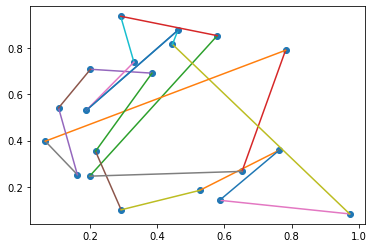

In [ ]:
global x,list_actor_loss,list_critic_loss
list_actor_loss=[]
list_critic_loss=[]
x=dict()

episodes=4000
find_the_best(episodes)

distances=list(x.keys())
opt=distances[0]
for i in range(len(distances)):
  if distances[i]<opt:
    opt=distances[i]
traj=x[opt]

plot_the_best(traj)
print('shortest distance',opt)

#A2C

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from torchsummary import summary
import random

In [ ]:
SEED=1
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
class Actor(nn.Module):
  def __init__(self,T,e):
    super().__init__()
    self.T=T
    self.e=e
    self.theta1=nn.Linear(self.e,self.e)
    self.theta2=nn.Linear(self.e,self.e)
    self.theta3=nn.Linear(self.e,self.e)
    self.theta4=nn.Linear(1,self.e)
    self.theta5=nn.Linear(2*self.e,1)
    self.theta6=nn.Linear(self.e,self.e)
    self.theta7=nn.Linear(self.e,self.e)

  def forward(self,xv,W):
    n=xv.shape[1]
    e=xv.shape[2]

    s1=self.theta1(xv)
    
    mu=torch.zeros(1,n,e)
    adj=torch.where(W>0,torch.ones_like(W) ,torch.zeros_like(W))
    s2=self.theta2(adj.matmul(mu))

    s3=self.theta3( torch.sum( F.relu(self.theta4(W.unsqueeze(3))) , dim=1) )

    for i in range(self.T):
      mu=F.relu(s1+s2+s3)
      s2=self.theta2(adj.matmul(mu))
      
    
    soft=F.softmax(mu,dim=1)
    p=torch.sum(soft,dim=2)
    #max_p=torch.max(p)
    #action=torch.argmax(p)
    return (p)


In [ ]:
def tensor(ans):
  xv=[]
  for i in range(n):
    if i not in ans:
      xv.append([0,coords[i,0],coords[i,1]])
    else:
      xv.append([1,coords[i,0],coords[i,1]])
  xv=torch.FloatTensor(xv)
  xv=xv.unsqueeze(0)  
  return (xv)
   

In [ ]:

class Critic(nn.Module):

  def __init__(self,T,e):
    super().__init__()
    self.T=T
    self.e=e
    self.theta1=nn.Linear(self.e,self.e)
    self.theta2=nn.Linear(self.e,self.e)
    self.theta3=nn.Linear(self.e,self.e)
    self.theta4=nn.Linear(1,self.e)
    self.theta5=nn.Linear(2*self.e,1)
    self.theta6=nn.Linear(self.e,self.e)
    self.theta7=nn.Linear(self.e,self.e)
  def forward(self,xv,W,action):
    n=xv.shape[1]
    e=xv.shape[2]

    s1=self.theta1(xv)
    
    mu=torch.zeros(1,n,e)
    adj=torch.where(W>0,torch.ones_like(W) ,torch.zeros_like(W))
    s2=self.theta2(adj.matmul(mu))

    s3=self.theta3( torch.sum( F.relu(self.theta4(W.unsqueeze(3))) , dim=1) )

    for i in range(self.T):
      mu=F.relu(s1+s2+s3)
      s2=self.theta2(adj.matmul(mu))

#q-values
    global_action=self.theta6(torch.sum(mu, dim=1, keepdim=True).repeat(1,n,1))
    local=self.theta7(mu)
    out=F.relu(torch.cat([global_action,local],dim=2))
  
    est_rew=self.theta5(out).squeeze(dim=2)
    q=est_rew[0][action]


    return (q)

In [ ]:
MIN_EPSILON = 0.1
EPSILON_DECAY_RATE = 6e-4  # epsilon decay

def find_the_best(e):
  c=1
  for episode in range(e):
    print('Episode number :{}  '.format(c),end="")
    
    sum_actor_loss=sum_critic_loss=0
    current_state=[0]                                                          # S =[0]
    next_state=[0]                                                             # S'=[0]
    
    while len(current_state)<n:
      
      
      actor_prob=actor(tensor(current_state),dist_mat)
      listed_prob=actor_prob.flatten().tolist()
      #print('listed_prob',listed_prob)
      
      epsilon = max(MIN_EPSILON, (1-EPSILON_DECAY_RATE)**e)
      if epsilon>=random.random():
        p_a=random.choice(listed_prob)
        action=listed_prob.index(p_a)
        while action in current_state:
          p_a=random.choice(listed_prob)
          action=listed_prob.index(p_a)       
      else:
        o=actor_prob.argsort(descending=True)
        for action in o[0]:
          if action not in current_state:
            p_a=listed_prob[action]
            break

      current_action=torch.tensor(action)                                       # a  = 3
      

      next_state.append(int(action))                                            # S' = [0,3]
      
      p=actor(tensor(next_state),dist_mat)
      listed_prob=p.flatten().tolist()
      o=p.argsort(descending=True)
      for action in o[0]:
        if action!=current_action:                                             ##p_a=listed_prob[action]
          next_action=action
          #print("a'",next_action)                                                    # a' = 1
          break



      
      r=-dist_mat[0,next_state[-2],next_state[-1]]                              # reward = dist[0,3]
      
      Q_current= critic(tensor(current_state),dist_mat,current_action)          # Q(S,a)
      Q_next = critic(tensor(next_state),dist_mat,next_action)                  # Q(S',a')
      adv=r+gamma*Q_next - Q_current                                            # r + gamma * Q(S',a') - Q(S,a)
      
      
      log_prob=torch.log(torch.tensor(p_a))                                    #log(pi)                                          
      actor_loss=-log_prob*Q_current                                           #log(pi) * Q(S,a)
      actor_loss.backward(retain_graph=True)
      optimizer_actor.step()
      lr_scheduler_actor.step()
      optimizer_actor.zero_grad()
      sum_actor_loss+=actor_loss

      critic_loss=-adv*Q_current                                               ##
      critic_loss.backward()
      optimizer_critic.step()
      lr_scheduler_critic.step()
      optimizer_critic.zero_grad()
      sum_critic_loss+=critic_loss

      current_state.append(next_state[-1])
      
      




    current_state.append(current_state[0])
    total_dist=0 
    for i in range(len(current_state)-1):
      total_dist+=dist_mat[0,current_state[i],current_state[i+1]]
    print('total_dist-',total_dist,end="")
    c+=1
    
    x[total_dist]=current_state
    list_actor_loss.append(sum_actor_loss)
    list_critic_loss.append(sum_critic_loss)
    print("  Actor loss {:.2f} | | critic loss {:.2f} ".format(sum_actor_loss,sum_critic_loss))
    

    

    #return(ans,total_dist)

In [ ]:
def plot_the_best(ans):
  plt.scatter(coords[:,0],coords[:,1])
  for i in ans:
    plt.plot([coords[ans[i],0],coords[ans[i+1],0]],[coords[ans[i],1],coords[ans[i+1],1]])

In [ ]:
gamma=0.99
actor=Actor(1,3)
critic=Critic(1,3)

optimizer_actor = optim.Adam(actor.parameters(), lr=5e-3)
lr_scheduler_actor = optim.lr_scheduler.ExponentialLR(optimizer_actor, gamma=1. - 2e-5)

optimizer_critic = optim.Adam(critic.parameters(), lr=5e-3)
lr_scheduler_critic = optim.lr_scheduler.ExponentialLR(optimizer_critic, gamma=1. - 2e-5)

##4 nodes


In [ ]:
n=4
coords=np.array([[0.39676747, 0.53881673],
        [0.41919451, 0.6852195 ],
        [0.20445225, 0.87811744],
        [0.02738759, 0.67046751]])
dist_mat=np. array([[0.        , 0.14811057, 0.39001296, 0.39213955],
        [0.14811057, 0.        , 0.28865872, 0.39208454],
        [0.39001296, 0.28865872, 0.        , 0.27289262],
        [0.39213955, 0.39208454, 0.27289262, 0.        ]])
dist_mat=-dist_mat
dist_mat= torch.FloatTensor(dist_mat)
dist_mat=dist_mat.unsqueeze(0)

Episode number :1  total_dist- tensor(-1.2031)  Actor loss 0.61 | | critic loss -0.74 
Episode number :2  total_dist- tensor(-1.1018)  Actor loss 0.85 | | critic loss -0.94 
Episode number :3  total_dist- tensor(-1.2031)  Actor loss 1.09 | | critic loss -1.41 
Episode number :4  total_dist- tensor(-1.1018)  Actor loss 1.34 | | critic loss -1.25 
Episode number :5  total_dist- tensor(-1.1018)  Actor loss 1.51 | | critic loss -1.46 
Episode number :6  total_dist- tensor(-1.1018)  Actor loss 1.63 | | critic loss -1.63 
Episode number :7  total_dist- tensor(-1.2031)  Actor loss 1.75 | | critic loss -2.07 
Episode number :8  total_dist- tensor(-1.4629)  Actor loss 1.96 | | critic loss -3.00 
Episode number :9  total_dist- tensor(-1.2031)  Actor loss 2.33 | | critic loss -3.04 
Episode number :10  total_dist- tensor(-1.1018)  Actor loss 2.77 | | critic loss -3.43 
Episode number :11  total_dist- tensor(-1.2031)  Actor loss 3.28 | | critic loss -4.80 
Episode number :12  total_dist- tensor(-1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_dist- tensor(-1.2031)  Actor loss 4.87 | | critic loss -8.24 
Episode number :14  total_dist- tensor(-1.4629)  Actor loss 6.01 | | critic loss -12.75 
Episode number :15  total_dist- tensor(-1.2031)  Actor loss 7.41 | | critic loss -16.82 
Episode number :16  total_dist- tensor(-1.1018)  Actor loss 9.17 | | critic loss -18.72 
Episode number :17  total_dist- tensor(-1.2031)  Actor loss 11.15 | | critic loss -29.76 
Episode number :18  total_dist- tensor(-1.1018)  Actor loss 13.62 | | critic loss -33.89 
Episode number :19  total_dist- tensor(-1.1018)  Actor loss 16.45 | | critic loss -45.28 
Episode number :20  total_dist- tensor(-1.1018)  Actor loss 19.75 | | critic loss -60.24 
Episode number :21  total_dist- tensor(-1.1018)  Actor loss 23.60 | | critic loss -79.79 
Episode number :22  total_dist- tensor(-1.2031)  Actor loss 28.03 | | critic loss -108.78 
Episode number :23  total_dist- tensor(-1.1018)  Actor loss 33.28 | | critic loss -138.06 
Episode number :24  total_dist- t

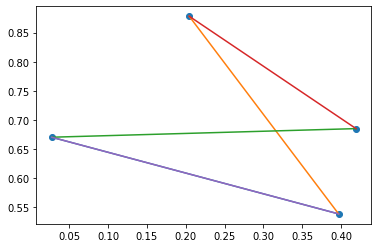

In [ ]:
global x,list_actor_loss, list_critic_loss
list_actor_loss=[]
list_critic_loss=[]
e=1000
x=dict()
find_the_best(e)
distances=list(x.keys())
opt=distances[0]
for i in range(len(distances)):
  if distances[i]<opt:
    opt=distances[i]
traj=x[opt]
plot_the_best(traj)
print('shortest distance',opt)


##5 nodes

In [ ]:
n=5
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])
dist_mat= torch.FloatTensor(dist_mat)
dist_mat=dist_mat.unsqueeze(0)

Episode number :1  total_dist- tensor(16.2854)  Actor loss 6.41 | | critic loss 41.16 
Episode number :2  total_dist- tensor(12.3592)  Actor loss 4.46 | | critic loss 20.81 
Episode number :3  total_dist- tensor(12.8705)  Actor loss 3.16 | | critic loss 15.16 
Episode number :4  total_dist- tensor(12.8705)  Actor loss 2.09 | | critic loss 10.02 
Episode number :5  total_dist- tensor(15.9198)  Actor loss 1.38 | | critic loss 6.75 
Episode number :6  total_dist- tensor(16.7575)  Actor loss 0.70 | | critic loss 3.31 
Episode number :7  total_dist- tensor(11.5215)  Actor loss 0.26 | | critic loss 0.24 
Episode number :8  total_dist- tensor(12.8705)  Actor loss -0.16 | | critic loss -0.81 
Episode number :9  total_dist- tensor(16.2854)  Actor loss -0.36 | | critic loss -3.75 
Episode number :10  total_dist- tensor(16.7575)  Actor loss -0.57 | | critic loss -4.66 
Episode number :11  total_dist- tensor(12.3592)  Actor loss -0.70 | | critic loss -4.08 
Episode number :12  total_dist- tensor(1

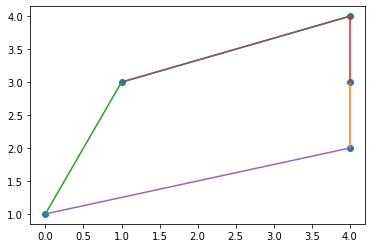

In [ ]:
global x,list_actor_loss, list_critic_loss
list_actor_loss=[]
list_critic_loss=[]
e=30
x=dict()
find_the_best(e)
distances=list(x.keys())
opt=distances[0]
for i in range(len(distances)):
  if distances[i]<opt:
    opt=distances[i]
traj=x[opt]
plot_the_best(traj)
print('shortest distance',opt)


##10 nodes

In [ ]:
n=10
coords=np.array([[0.96222682, 0.81789497],
       [0.01782511, 0.93226486],
       [0.3518051 , 0.82315222],
       [0.33063835, 0.57929051],
       [0.02360734, 0.4305754 ],
       [0.29650064, 0.28795597],
       [0.53866827, 0.23490321],
       [0.70254764, 0.60307924],
       [0.71190645, 0.15977665],
       [0.36290907, 0.12392136]])

dist_mat=np.array([[-0.        , -0.95130178, -0.61044436, -0.67515633, -1.01539302,
        -0.85089758, -0.72061171, -0.33701494, -0.70411647, -0.91694118],
       [-0.95130178, -0.        , -0.35135197, -0.47163865, -0.50172278,
        -0.70199288, -0.87039697, -0.75974214, -1.03850227, -0.87892102],
       [-0.61044436, -0.35135197, -0.        , -0.2447786 , -0.51169359,
        -0.5380461 , -0.61721531, -0.41406816, -0.75481132, -0.69931902],
       [-0.67515633, -0.47163865, -0.2447786 , -0.        , -0.34115133,
        -0.29332781, -0.40234197, -0.37266932, -0.5668838 , -0.45651119],
       [-1.01539302, -0.50172278, -0.51169359, -0.34115133, -0.        ,
        -0.30791404, -0.55097675, -0.70051232, -0.73965373, -0.45734272],
       [-0.85089758, -0.70199288, -0.5380461 , -0.29332781, -0.30791404,
        -0.        , -0.24791079, -0.51398137, -0.43473202, -0.17696732],
       [-0.72061171, -0.87039697, -0.61721531, -0.40234197, -0.55097675,
        -0.24791079, -0.        , -0.40300129, -0.18882655, -0.20786599],
       [-0.33701494, -0.75974214, -0.41406816, -0.37266932, -0.70051232,
        -0.51398137, -0.40300129, -0.        , -0.44340137, -0.58732158],
       [-0.70411647, -1.03850227, -0.75481132, -0.5668838 , -0.73965373,
        -0.43473202, -0.18882655, -0.44340137, -0.        , -0.3508344 ],
       [-0.91694118, -0.87892102, -0.69931902, -0.45651119, -0.45734272,
        -0.17696732, -0.20786599, -0.58732158, -0.3508344 , -0.        ]])
dist_mat= torch.FloatTensor(dist_mat)
dist_mat=-dist_mat.unsqueeze(0)

Episode number :1  total_dist- tensor(5.2168)  Actor loss 59.86 | | critic loss 26.91 
Episode number :2  total_dist- tensor(5.2168)  Actor loss 15.95 | | critic loss 6.63 
Episode number :3  total_dist- tensor(5.2168)  Actor loss -11.52 | | critic loss -4.54 
Episode number :4  total_dist- tensor(5.2168)  Actor loss -21.99 | | critic loss -8.54 
Episode number :5  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_dist- tensor(5.2168)  Actor loss -29.45 | | critic loss -12.71 
Episode number :6  total_dist- tensor(5.2168)  Actor loss -40.25 | | critic loss -20.75 
Episode number :7  total_dist- tensor(5.2168)  Actor loss -56.53 | | critic loss -38.18 
Episode number :8  total_dist- tensor(4.9147)  Actor loss -82.08 | | critic loss -75.82 
Episode number :9  total_dist- tensor(5.8360)  Actor loss -123.01 | | critic loss -183.22 
Episode number :10  total_dist- tensor(5.2591)  Actor loss -189.06 | | critic loss -418.32 
Episode number :11  total_dist- tensor(5.4528)  Actor loss -292.53 | | critic loss -1008.42 
Episode number :12  total_dist- tensor(5.2168)  Actor loss -449.48 | | critic loss -2345.67 
Episode number :13  total_dist- tensor(5.2149)  Actor loss -676.75 | | critic loss -5293.05 
Episode number :14  total_dist- tensor(4.9147)  Actor loss -996.41 | | critic loss -11271.79 
Episode number :15  total_dist- tensor(5.5482)  Actor loss -1423.15 | | critic loss -23899.94 
Episode numb

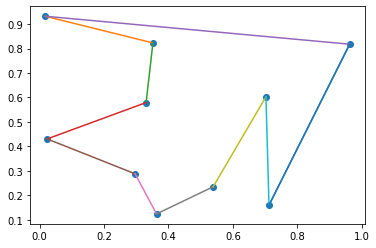

In [ ]:
global list_actor_loss,list_critic_loss
list_actor_loss=[]
list_critic_loss=[]
global x
e=4000
x=dict()
find_the_best(e)
distances=list(x.keys())
opt=distances[0]
for i in range(len(distances)):
  if distances[i]<opt:
    opt=distances[i]
traj=x[opt]
plot_the_best(traj)
print('shortest distance',opt)






##20 nodes

In [ ]:
n=20
coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[-0.        , -0.60001635, -0.69288158, -0.57828654, -0.19026258,
        -0.74614952, -0.18085482, -0.31029269, -0.3314574 , -0.79518088,
        -0.69595595, -0.11921825, -0.20112521, -0.68394958, -0.94464125,
        -0.4404823 , -0.48896882, -0.63981237, -0.62148559, -0.06305272],
       [-0.60001635, -0.        , -0.6096485 , -0.54643148, -0.57611814,
        -0.2801591 , -0.74710006, -0.66153736, -0.43257423, -0.5363238 ,
        -0.2936458 , -0.5286757 , -0.50420209, -0.57504916, -0.34629786,
        -0.59903565, -0.68129507, -0.14390819, -0.69684521, -0.5574272 ],
       [-0.69288158, -0.6096485 , -0.        , -0.11472279, -0.5152005 ,
        -0.43726687, -0.69741322, -0.45760971, -0.82029961, -0.20019115,
        -0.37011518, -0.73140247, -0.49214671, -0.03700231, -0.82736361,
        -0.280085  , -0.29420794, -0.48979777, -0.17340941, -0.63098083],
       [-0.57828654, -0.54643148, -0.11472279, -0.        , -0.40229003,
        -0.42563941, -0.58895042, -0.35501951, -0.71433719, -0.26453563,
        -0.3530685 , -0.61758619, -0.37745903, -0.10916506, -0.80293554,
        -0.17962112, -0.21741289, -0.44426651, -0.1555766 , -0.51630174],
       [-0.19026258, -0.57611814, -0.5152005 , -0.40229003, -0.        ,
        -0.64985727, -0.20233598, -0.13289996, -0.45378969, -0.64016338,
        -0.58843568, -0.27307583, -0.07191649, -0.5107664 , -0.91813886,
        -0.25165433, -0.29915086, -0.57173305, -0.43192382, -0.13808814],
       [-0.74614952, -0.2801591 , -0.43726687, -0.42563941, -0.64985727,
        -0.        , -0.84890351, -0.68464087, -0.67800129, -0.29566197,
        -0.07305885, -0.71240533, -0.58566454, -0.40039258, -0.39123464,
        -0.55569503, -0.6237957 , -0.14162712, -0.57799997, -0.68935477],
       [-0.18085482, -0.74710006, -0.69741322, -0.58895042, -0.20233598,
        -0.84890351, -0.        , -0.24641672, -0.51197429, -0.83749015,
        -0.78924013, -0.29933824, -0.26325144, -0.69806256, -1.09326217,
        -0.41921273, -0.43747985, -0.76213478, -0.5852434 , -0.19605849],
       [-0.31029269, -0.66153736, -0.45760971, -0.35501951, -0.13289996,
        -0.68464087, -0.24641672, -0.        , -0.58591801, -0.61481798,
        -0.61647621, -0.40423899, -0.18378021, -0.46245904, -0.99282405,
        -0.1775649 , -0.19217537, -0.6310855 , -0.33891272, -0.26668711],
       [-0.3314574 , -0.43257423, -0.82029961, -0.71433719, -0.45378969,
        -0.67800129, -0.51197429, -0.58591801, -0.        , -0.84582561,
        -0.65771907, -0.21265702, -0.40923866, -0.79759615, -0.7332192 ,
        -0.64659318, -0.71959818, -0.53979921, -0.81561159, -0.33733856],
       [-0.79518088, -0.5363238 , -0.20019115, -0.26453563, -0.64016338,
        -0.29566197, -0.83749015, -0.61481798, -0.84582561, -0.        ,
        -0.24827655, -0.80598355, -0.59838216, -0.17315241, -0.67977252,
        -0.44309958, -0.47858707, -0.39595434, -0.37286812, -0.73221293],
       [-0.69595595, -0.2936458 , -0.37011518, -0.3530685 , -0.58843568,
        -0.07305885, -0.78924013, -0.61647621, -0.65771907, -0.24827655,
        -0.        , -0.67154895, -0.52668963, -0.33311421, -0.45741009,
        -0.48358187, -0.55093118, -0.15021474, -0.50612738, -0.63725743],
       [-0.11921825, -0.5286757 , -0.73140247, -0.61758619, -0.27307583,
        -0.71240533, -0.29933824, -0.40423899, -0.21265702, -0.80598355,
        -0.67154895, -0.        , -0.25299983, -0.71682005, -0.86599412,
        -0.50566234, -0.5661908 , -0.59196952, -0.6857113 , -0.13849416],
       [-0.20112521, -0.50420209, -0.49214671, -0.37745903, -0.07191649,
        -0.58566454, -0.26325144, -0.18378021, -0.40923866, -0.59838216,
        -0.52668963, -0.25299983, -0.        , -0.48282438, -0.84642083,
        -0.25266693, -0.31600766, -0.50232732, -0.43292366, -0.13884631],
       [-0.68394958, -0.57504916, -0.03700231, -0.10916506, -0.5107664 ,
        -0.40039258, -0.69806256, -0.46245904, -0.79759615, -0.17315241,
        -0.33311421, -0.71682005, -0.48282438, -0.        , -0.79037877,
        -0.28546752, -0.30945139, -0.45363729, -0.20068363, -0.62148642],
       [-0.94464125, -0.34629786, -0.82736361, -0.80293554, -0.91813886,
        -0.39123464, -1.09326217, -0.99282405, -0.7332192 , -0.67977252,
        -0.45741009, -0.86599412, -0.84642083, -0.79037877, -0.        ,
        -0.90237746, -0.97968778, -0.3692403 , -0.9582732 , -0.90352714],
       [-0.4404823 , -0.59903565, -0.280085  , -0.17962112, -0.25165433,
        -0.55569503, -0.41921273, -0.1775649 , -0.64659318, -0.44309958,
        -0.48358187, -0.50566234, -0.25266693, -0.28546752, -0.90237746,
        -0.        , -0.08333794, -0.53313762, -0.18134226, -0.38327394],
       [-0.48896882, -0.68129507, -0.29420794, -0.21741289, -0.29915086,
        -0.6237957 , -0.43747985, -0.19217537, -0.71959818, -0.47858707,
        -0.55093118, -0.5661908 , -0.31600766, -0.30945139, -0.97968778,
        -0.08333794, -0.        , -0.610796  , -0.14934068, -0.43642365],
       [-0.63981237, -0.14390819, -0.48979777, -0.44426651, -0.57173305,
        -0.14162712, -0.76213478, -0.6310855 , -0.53979921, -0.39595434,
        -0.15021474, -0.59196952, -0.50232732, -0.45363729, -0.3692403 ,
        -0.53313762, -0.610796  , -0.        , -0.5994127 , -0.58756916],
       [-0.62148559, -0.69684521, -0.17340941, -0.1555766 , -0.43192382,
        -0.57799997, -0.5852434 , -0.33891272, -0.81561159, -0.37286812,
        -0.50612738, -0.6857113 , -0.43292366, -0.20068363, -0.9582732 ,
        -0.18134226, -0.14934068, -0.5994127 , -0.        , -0.56461214],
       [-0.06305272, -0.5574272 , -0.63098083, -0.51630174, -0.13808814,
        -0.68935477, -0.19605849, -0.26668711, -0.33733856, -0.73221293,
        -0.63725743, -0.13849416, -0.13884631, -0.62148642, -0.90352714,
        -0.38327394, -0.43642365, -0.58756916, -0.56461214, -0.        ]])
dist_mat= torch.FloatTensor(dist_mat)
dist_mat=-dist_mat.unsqueeze(0)


Episode number :1  total_dist- tensor(7.7511)  Actor loss 639.19 | | critic loss 249.28 
Episode number :2  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_dist- tensor(7.7741)  Actor loss -25.02 | | critic loss 1.67 
Episode number :3  total_dist- tensor(7.3731)  Actor loss -151.64 | | critic loss -38.58 
Episode number :4  total_dist- tensor(8.5756)  Actor loss -258.32 | | critic loss -122.11 
Episode number :5  total_dist- tensor(7.9623)  Actor loss -502.10 | | critic loss -547.27 
Episode number :6  total_dist- tensor(7.7741)  Actor loss -1162.93 | | critic loss -3555.75 
Episode number :7  total_dist- tensor(9.4499)  Actor loss -2879.06 | | critic loss -23688.80 
Episode number :8  total_dist- tensor(7.6035)  Actor loss -6598.69 | | critic loss -123382.27 
Episode number :9  total_dist- tensor(7.7741)  Actor loss -13583.81 | | critic loss -518228.28 
Episode number :10  total_dist- tensor(8.2067)  Actor loss -25604.84 | | critic loss -1825587.38 
Episode number :11  total_dist- tensor(8.7641)  Actor loss -45008.19 | | critic loss -5561184.50 
Episode number :12  total_dist- tensor(8.5382)  Actor loss -74556.37 | | critic loss -

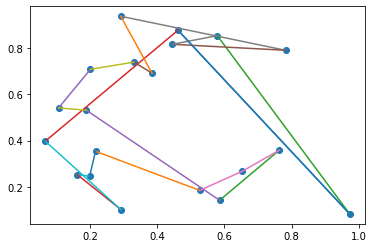

In [ ]:
global x,list_actor_loss,list_critic_loss
list_actor_loss=list_critic_loss=[]
e=4000
x=dict()
find_the_best(e)
distances=list(x.keys())
opt=distances[0]
for i in range(len(distances)):
  if distances[i]<opt:
    opt=distances[i]
traj=x[opt]
plot_the_best(traj)
print('shortest distance',opt)

#A2C(cartpole exmpl)

In [ ]:
import torch
import gym
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import math
from torch import optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt


In [ ]:
seed=1
torch.manual_seed(seed)
random.seed(seed)
gamma = 0.99
eps = np.finfo(np.float32).eps.item()
epsilon = 1. 

In [ ]:
class Actor_critic(nn.Module):
    def __init__(self,num_actions,num_value):
        super().__init__()
        self.layer1=nn.Linear(1,128)
        self.actor=nn.Linear(128,num_actions)
        self.critic=nn.Linear(128,num_value)
    def forward(self,state):
        common=F.relu(self.layer1(state))
        actor_prob=F.softmax(self.actor(common),dim=-1)
        critic_value=self.critic(common)
        
        return(actor_prob,critic_value)

##4 nodes

In [ ]:
n=4
model=Actor_critic(n,1)
opt= optim.Adam(model.parameters(), lr=0.01)
coords=np.array([[0.39676747, 0.53881673],
        [0.41919451, 0.6852195 ],
        [0.20445225, 0.87811744],
        [0.02738759, 0.67046751]])
dist_mat=np. array([[0.        , 0.14811057, 0.39001296, 0.39213955],
        [0.14811057, 0.        , 0.28865872, 0.39208454],
        [0.39001296, 0.28865872, 0.        , 0.27289262],
        [0.39213955, 0.39208454, 0.27289262, 0.        ]])


Episode no 1 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 8.48
Episode no 2 path [0, 3, 2, 1, 0] episode_reward 1.10 || loss 4.32
Episode no 3 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 1.13
Episode no 4 path [0, 3, 2, 1, 0] episode_reward 1.10 || loss -0.87
Episode no 5 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 0.25
Episode no 6 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 0.35
Episode no 7 path [0, 3, 1, 2, 0] episode_reward 1.46 || loss 1.21
Episode no 8 path [0, 2, 1, 3, 0] episode_reward 1.46 || loss 0.37
Episode no 9 path [0, 3, 1, 2, 0] episode_reward 1.46 || loss 0.87
Episode no 10 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 0.01
Episode no 11 path [0, 1, 3, 2, 0] episode_reward 1.20 || loss 0.85
Episode no 12 path [0, 2, 1, 3, 0] episode_reward 1.46 || loss 1.15
Episode no 13 path [0, 2, 1, 3, 0] episode_reward 1.46 || loss 1.24
Episode no 14 path [0, 3, 2, 1, 0] episode_reward 1.10 || loss 0.11
Episode no 15 path [0, 2, 1, 3, 0] episode_reward 1.46 |

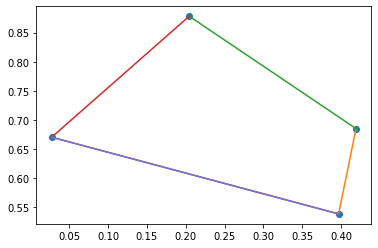

In [ ]:
reward_hist=[]
actor_lprob_hist=[]
critc_value_hist=[]
total_distance=3000
episodes=1000

epsilon=1
for episode in range(episodes):
  path=[0]
  episode_reward=0
  current_state=torch.tensor([0]).float()
  while len(path)<n:

    actor_prob,critic_value=model(current_state)
    
    if epsilon>random.random():
      action=random.randint(0,n-1)
      while action in path:
        action=random.randint(0,n-1)
      current_action=action
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)  
    else:
      sorted_prob=actor_prob.argsort(descending=True)
      for action in sorted_prob:
        if action not in path:
          current_action=action.item()
          break
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)                                       
    
    critc_value_hist.append(critic_value)                                     #V(s)

    
    r=-float(dist_mat[int(current_state),current_action])
    reward_hist.append(r)
    episode_reward+=r
    
    current_state=torch.tensor([current_action]).float() 
    path.append(current_action)
    

  path.append(path[0])                                                         #Final path
  episode_reward-=dist_mat[path[-2],path[-1]]                                  #Total distance
  
  returns=[]
  critic_loss=[]
  actor_loss=[]
  ds=0
  
  for r in reward_hist[::-1]:
    ds=r+gamma*ds
    returns.insert(0,ds)
  returns=torch.tensor(returns)
  returns=returns-returns.mean()/returns.std()+eps

  hist=zip(actor_lprob_hist,critc_value_hist,returns)


  for log_prob,v_c,ret in hist:
    adv=ret.float()-v_c.item()
    actor_loss.append(-log_prob*adv)                                           #-log(pi)*V
    critic_loss.append(F.smooth_l1_loss(v_c, torch.tensor([ret])))             #critic_loss
  
  opt.zero_grad()
  loss=torch.stack(actor_loss).sum()+torch.stack(critic_loss).sum()
  loss.backward()
  opt.step()
  epsilon = 1. - episode * 1/episodes
  #print('current_critic_value',current_critc_value_hist,"returns",returns)
  #print('reward_hist {} returns {} critic_value {}'.format(reward_hist,returns,critc_value_hist))
  
  actor_lprob_hist.clear()
  critc_value_hist.clear()
  reward_hist.clear()
  episode_reward*=-1
  total_dist=0 
  if episode_reward<total_distance:
    total_distance=episode_reward
    shortest_path=path

  print('Episode no {} path {} episode_reward {:.2f}'.format(episode+1,path,episode_reward),end="")
  print(" || loss {:.2f}".format(loss))

plt.scatter(coords[:,0],coords[:,1])
for i in shortest_path:
  plt.plot([coords[shortest_path[i],0],coords[shortest_path[i+1],0]],[coords[shortest_path[i],1],coords[shortest_path[i+1],1]])
print('Shortest Distance',total_distance)

##5 nodes

In [ ]:
n=5
model=Actor_critic(n,1)
opt= optim.Adam(model.parameters(), lr=0.01)
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])


Episode no 1 path [0, 2, 3, 1, 4, 0] episode_reward -16.29 || loss 5.60
Episode no 2 path [0, 3, 1, 2, 4, 0] episode_reward -12.36 || loss 1.81
Episode no 3 path [0, 3, 4, 1, 2, 0] episode_reward -12.87 || loss 7.17
Episode no 4 path [0, 3, 4, 1, 2, 0] episode_reward -12.87 || loss 8.91
Episode no 5 path [0, 2, 4, 3, 1, 0] episode_reward -15.92 || loss -5.14
Episode no 6 path [0, 4, 3, 1, 2, 0] episode_reward -16.76 || loss -7.74
Episode no 7 path [0, 2, 4, 1, 3, 0] episode_reward -11.52 || loss 14.72
Episode no 8 path [0, 3, 4, 1, 2, 0] episode_reward -12.87 || loss 14.31
Episode no 9 path [0, 4, 2, 3, 1, 0] episode_reward -16.29 || loss -1.76
Episode no 10 path [0, 4, 3, 1, 2, 0] episode_reward -16.76 || loss -2.37
Episode no 11 path [0, 4, 2, 1, 3, 0] episode_reward -12.36 || loss 16.58
Episode no 12 path [0, 2, 4, 1, 3, 0] episode_reward -11.52 || loss 14.42
Episode no 13 path [0, 3, 2, 1, 4, 0] episode_reward -13.24 || loss -2.56
Episode no 14 path [0, 4, 1, 3, 2, 0] episode_rewar

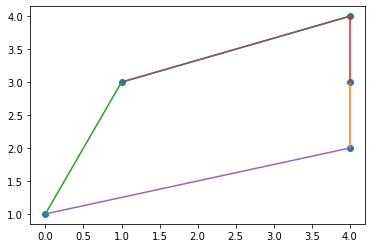

In [ ]:
reward_hist=[]
actor_lprob_hist=[]
critc_value_hist=[]
episodes=1000
total_distance=3000

epsilon=1
for episode in range(episodes):
  path=[0]
  episode_reward=0
  current_state=torch.tensor([0]).float()
  while len(path)<n:

    actor_prob,critic_value=model(current_state)
    
    
    if epsilon>random.random():
      action=random.randint(0,n-1)
      while action in path:
        action=random.randint(0,n-1)
      current_action=action
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)
      #print('actor_prob {} log_prob'.format(actor_prob[action],math.log(actor_prob[action])))  
    else:
      sorted_prob=actor_prob.argsort(descending=True)
      for action in sorted_prob:
        if action not in path:
          current_action=action.item()
          break
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)
      #print('actor_prob {} log_prob'.format(actor_prob[action],math.log(actor_prob[current_action])))                                        
    
    critc_value_hist.append(critic_value)                                     #V(s)

    
    r=-float(dist_mat[int(current_state),current_action])
    reward_hist.append(r)
    episode_reward+=r
    
    current_state=torch.tensor([current_action]).float() 
    path.append(current_action)
    

  path.append(path[0])                                                         #Final path
  episode_reward-=dist_mat[path[-2],path[-1]]                                  #Total distance
  
  returns=[]
  critic_loss=[]
  actor_loss=[]
  ds=0
  
  for r in reward_hist[::-1]:
    ds=r+gamma*ds
    returns.insert(0,ds)
  returns=torch.tensor(returns)
  returns=returns-returns.mean()/returns.std()+eps

  hist=zip(actor_lprob_hist,critc_value_hist,returns)


  for log_prob,v_c,ret in hist:
    adv=ret.float()-v_c.item()
    actor_loss.append(-log_prob*adv)                                           #-log(pi)*V
    critic_loss.append(F.smooth_l1_loss(v_c, torch.tensor([ret])))             #critic_loss
  
  opt.zero_grad()
  loss=torch.stack(actor_loss).sum()+torch.stack(critic_loss).sum()
  loss.backward()
  opt.step()
  epsilon = 1. - episode * 1/episodes
  #print('current_critic_value',current_critc_value_hist,"returns",returns)
  #print('reward_hist {} returns {} critic_value {}'.format(reward_hist,returns,critc_value_hist))
  
  actor_lprob_hist.clear()
  critc_value_hist.clear()
  reward_hist.clear()
  episode_reward*=-1
  if episode_reward<total_distance:
    total_distance=episode_reward
    shortest_path=path

  print('Episode no {} path {} episode_reward {:.2f}'.format(episode+1,path,-episode_reward),end="")
  print(" || loss {:.2f}".format(loss))
plt.scatter(coords[:,0],coords[:,1])
for i in shortest_path:
  plt.plot([coords[shortest_path[i],0],coords[shortest_path[i+1],0]],[coords[shortest_path[i],1],coords[shortest_path[i+1],1]])
print('Shortest Distance',total_distance)

##10 nodes

In [ ]:
n=10
model=Actor_critic(n,1)
opt= optim.Adam(model.parameters(), lr=0.01)
coords=np.array([[0.96222682, 0.81789497],
       [0.01782511, 0.93226486],
       [0.3518051 , 0.82315222],
       [0.33063835, 0.57929051],
       [0.02360734, 0.4305754 ],
       [0.29650064, 0.28795597],
       [0.53866827, 0.23490321],
       [0.70254764, 0.60307924],
       [0.71190645, 0.15977665],
       [0.36290907, 0.12392136]])
dist_mat=np.array([[0.        , 0.95130178, 0.61044436, 0.67515633, 1.01539302,
        0.85089758, 0.72061171, 0.33701494, 0.70411647, 0.91694118],
       [0.95130178, 0.        , 0.35135197, 0.47163865, 0.50172278,
        0.70199288, 0.87039697, 0.75974214, 1.03850227, 0.87892102],
       [0.61044436, 0.35135197, 0.        , 0.2447786 , 0.51169359,
        0.5380461 , 0.61721531, 0.41406816, 0.75481132, 0.69931902],
       [0.67515633, 0.47163865, 0.2447786 , 0.        , 0.34115133,
        0.29332781, 0.40234197, 0.37266932, 0.5668838 , 0.45651119],
       [1.01539302, 0.50172278, 0.51169359, 0.34115133, 0.        ,
        0.30791404, 0.55097675, 0.70051232, 0.73965373, 0.45734272],
       [0.85089758, 0.70199288, 0.5380461 , 0.29332781, 0.30791404,
        0.        , 0.24791079, 0.51398137, 0.43473202, 0.17696732],
       [0.72061171, 0.87039697, 0.61721531, 0.40234197, 0.55097675,
        0.24791079, 0.        , 0.40300129, 0.18882655, 0.20786599],
       [0.33701494, 0.75974214, 0.41406816, 0.37266932, 0.70051232,
        0.51398137, 0.40300129, 0.        , 0.44340137, 0.58732158],
       [0.70411647, 1.03850227, 0.75481132, 0.5668838 , 0.73965373,
        0.43473202, 0.18882655, 0.44340137, 0.        , 0.3508344 ],
       [0.91694118, 0.87892102, 0.69931902, 0.45651119, 0.45734272,
        0.17696732, 0.20786599, 0.58732158, 0.3508344 , 0.        ]])

Episode no 1 path [0, 1, 7, 6, 9, 4, 3, 5, 8, 2, 0] episode_reward -5.21 || loss -11.91
Episode no 2 path [0, 4, 5, 8, 6, 3, 9, 7, 2, 1, 0] episode_reward -5.11 || loss 12.62
Episode no 3 path [0, 8, 2, 6, 7, 9, 3, 5, 4, 1, 0] episode_reward -5.58 || loss 17.59
Episode no 4 path [0, 4, 1, 7, 3, 9, 2, 8, 5, 6, 0] episode_reward -5.96 || loss 19.99
Episode no 5 path [0, 3, 4, 8, 9, 6, 2, 7, 5, 1, 0] episode_reward -5.51 || loss 0.04
Episode no 6 path [0, 4, 2, 8, 9, 7, 6, 1, 3, 5, 0] episode_reward -6.11 || loss -15.47
Episode no 7 path [0, 6, 2, 5, 9, 3, 1, 8, 7, 4, 0] episode_reward -6.18 || loss -3.68
Episode no 8 path [0, 9, 4, 5, 3, 7, 8, 6, 2, 1, 0] episode_reward -4.90 || loss 5.28
Episode no 9 path [0, 6, 8, 1, 5, 9, 7, 4, 3, 2, 0] episode_reward -5.31 || loss -6.22
Episode no 10 path [0, 2, 1, 6, 8, 4, 7, 3, 9, 5, 0] episode_reward -5.32 || loss 5.34
Episode no 11 path [0, 1, 9, 4, 8, 7, 2, 3, 5, 6, 0] episode_reward -5.39 || loss 9.91
Episode no 12 path [0, 5, 9, 4, 1, 3, 6, 8,

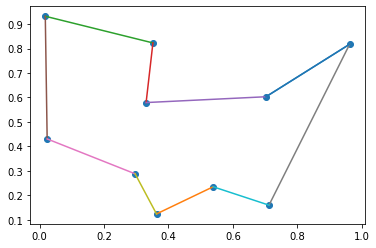

In [ ]:
reward_hist=[]
actor_lprob_hist=[]
critc_value_hist=[]
episodes=4000
total_distance=3000

epsilon=1
for episode in range(episodes):
  path=[0]
  episode_reward=0
  current_state=torch.tensor([0]).float()
  while len(path)<n:

    actor_prob,critic_value=model(current_state)
    
    if epsilon>random.random():
      action=random.randint(0,n-1)
      while action in path:
        action=random.randint(0,n-1)
      current_action=action
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)
      #print('actor_prob {} log_prob {}'.format(actor_prob[action],math.log(actor_prob[action])))   
    else:
      sorted_prob=actor_prob.argsort(descending=True)
      for action in sorted_prob:
        if action not in path:
          current_action=action.item()
          break
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)
      #print('actor_prob {} log_prob {}'.format(actor_prob[action],math.log(actor_prob[current_action])))                                        
    
    critc_value_hist.append(critic_value)                                     #V(s)

    
    r=-float(dist_mat[int(current_state),current_action])
    reward_hist.append(r)
    episode_reward+=r
    
    current_state=torch.tensor([current_action]).float() 
    path.append(current_action)
    

  path.append(path[0])                                                         #Final path
  episode_reward-=dist_mat[path[-2],path[-1]]                                  #Total distance
  
  returns=[]
  critic_loss=[]
  actor_loss=[]
  ds=0
  
  for r in reward_hist[::-1]:
    ds=r+gamma*ds
    returns.insert(0,ds)
  returns=torch.tensor(returns)
  returns=returns-returns.mean()/returns.std()+eps

  hist=zip(actor_lprob_hist,critc_value_hist,returns)


  for log_prob,v_c,ret in hist:
    adv=ret.float()-v_c.item()
    #print('adv {:.2f}'.format(adv))
    actor_loss.append(-log_prob*adv)                                           #-log(pi)*V
    #print('actor_loss',-log_prob*adv)
    critic_loss.append(F.smooth_l1_loss(v_c, torch.tensor([ret])))             #critic_loss
  
  opt.zero_grad()
  loss=torch.stack(actor_loss).sum()+torch.stack(critic_loss).sum()
  loss.backward()
  opt.step()
  epsilon = 1. - episode * 1/episodes
  #print('current_critic_value',current_critc_value_hist,"returns",returns)
  #print('reward_hist {} returns {} critic_value {}'.format(reward_hist,returns,current_critc_value_hist))
  
  actor_lprob_hist.clear()
  critc_value_hist.clear()
  reward_hist.clear()
  episode_reward*=-1
  if episode_reward<total_distance:
    total_distance=episode_reward
    shortest_path=path

  print('Episode no {} path {} episode_reward {:.2f}'.format(episode+1,path,-episode_reward),end="")
  print(" || loss {:.2f}".format(loss))
plt.scatter(coords[:,0],coords[:,1])
for i in shortest_path:
  plt.plot([coords[shortest_path[i],0],coords[shortest_path[i+1],0]],[coords[shortest_path[i],1],coords[shortest_path[i+1],1]])
print('Shortest Distance',total_distance)

##20 nodes

In [ ]:
n=20
model=Actor_critic(n,1)
opt= optim.Adam(model.parameters(), lr=0.01)
coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[0.        , 0.60001635, 0.69288158, 0.57828654, 0.19026258,
        0.74614952, 0.18085482, 0.31029269, 0.3314574 , 0.79518088,
        0.69595595, 0.11921825, 0.20112521, 0.68394958, 0.94464125,
        0.4404823 , 0.48896882, 0.63981237, 0.62148559, 0.06305272],
       [0.60001635, 0.        , 0.6096485 , 0.54643148, 0.57611814,
        0.2801591 , 0.74710006, 0.66153736, 0.43257423, 0.5363238 ,
        0.2936458 , 0.5286757 , 0.50420209, 0.57504916, 0.34629786,
        0.59903565, 0.68129507, 0.14390819, 0.69684521, 0.5574272 ],
       [0.69288158, 0.6096485 , 0.        , 0.11472279, 0.5152005 ,
        0.43726687, 0.69741322, 0.45760971, 0.82029961, 0.20019115,
        0.37011518, 0.73140247, 0.49214671, 0.03700231, 0.82736361,
        0.280085  , 0.29420794, 0.48979777, 0.17340941, 0.63098083],
       [0.57828654, 0.54643148, 0.11472279, 0.        , 0.40229003,
        0.42563941, 0.58895042, 0.35501951, 0.71433719, 0.26453563,
        0.3530685 , 0.61758619, 0.37745903, 0.10916506, 0.80293554,
        0.17962112, 0.21741289, 0.44426651, 0.1555766 , 0.51630174],
       [0.19026258, 0.57611814, 0.5152005 , 0.40229003, 0.        ,
        0.64985727, 0.20233598, 0.13289996, 0.45378969, 0.64016338,
        0.58843568, 0.27307583, 0.07191649, 0.5107664 , 0.91813886,
        0.25165433, 0.29915086, 0.57173305, 0.43192382, 0.13808814],
       [0.74614952, 0.2801591 , 0.43726687, 0.42563941, 0.64985727,
        0.        , 0.84890351, 0.68464087, 0.67800129, 0.29566197,
        0.07305885, 0.71240533, 0.58566454, 0.40039258, 0.39123464,
        0.55569503, 0.6237957 , 0.14162712, 0.57799997, 0.68935477],
       [0.18085482, 0.74710006, 0.69741322, 0.58895042, 0.20233598,
        0.84890351, 0.        , 0.24641672, 0.51197429, 0.83749015,
        0.78924013, 0.29933824, 0.26325144, 0.69806256, 1.09326217,
        0.41921273, 0.43747985, 0.76213478, 0.5852434 , 0.19605849],
       [0.31029269, 0.66153736, 0.45760971, 0.35501951, 0.13289996,
        0.68464087, 0.24641672, 0.        , 0.58591801, 0.61481798,
        0.61647621, 0.40423899, 0.18378021, 0.46245904, 0.99282405,
        0.1775649 , 0.19217537, 0.6310855 , 0.33891272, 0.26668711],
       [0.3314574 , 0.43257423, 0.82029961, 0.71433719, 0.45378969,
        0.67800129, 0.51197429, 0.58591801, 0.        , 0.84582561,
        0.65771907, 0.21265702, 0.40923866, 0.79759615, 0.7332192 ,
        0.64659318, 0.71959818, 0.53979921, 0.81561159, 0.33733856],
       [0.79518088, 0.5363238 , 0.20019115, 0.26453563, 0.64016338,
        0.29566197, 0.83749015, 0.61481798, 0.84582561, 0.        ,
        0.24827655, 0.80598355, 0.59838216, 0.17315241, 0.67977252,
        0.44309958, 0.47858707, 0.39595434, 0.37286812, 0.73221293],
       [0.69595595, 0.2936458 , 0.37011518, 0.3530685 , 0.58843568,
        0.07305885, 0.78924013, 0.61647621, 0.65771907, 0.24827655,
        0.        , 0.67154895, 0.52668963, 0.33311421, 0.45741009,
        0.48358187, 0.55093118, 0.15021474, 0.50612738, 0.63725743],
       [0.11921825, 0.5286757 , 0.73140247, 0.61758619, 0.27307583,
        0.71240533, 0.29933824, 0.40423899, 0.21265702, 0.80598355,
        0.67154895, 0.        , 0.25299983, 0.71682005, 0.86599412,
        0.50566234, 0.5661908 , 0.59196952, 0.6857113 , 0.13849416],
       [0.20112521, 0.50420209, 0.49214671, 0.37745903, 0.07191649,
        0.58566454, 0.26325144, 0.18378021, 0.40923866, 0.59838216,
        0.52668963, 0.25299983, 0.        , 0.48282438, 0.84642083,
        0.25266693, 0.31600766, 0.50232732, 0.43292366, 0.13884631],
       [0.68394958, 0.57504916, 0.03700231, 0.10916506, 0.5107664 ,
        0.40039258, 0.69806256, 0.46245904, 0.79759615, 0.17315241,
        0.33311421, 0.71682005, 0.48282438, 0.        , 0.79037877,
        0.28546752, 0.30945139, 0.45363729, 0.20068363, 0.62148642],
       [0.94464125, 0.34629786, 0.82736361, 0.80293554, 0.91813886,
        0.39123464, 1.09326217, 0.99282405, 0.7332192 , 0.67977252,
        0.45741009, 0.86599412, 0.84642083, 0.79037877, 0.        ,
        0.90237746, 0.97968778, 0.3692403 , 0.9582732 , 0.90352714],
       [0.4404823 , 0.59903565, 0.280085  , 0.17962112, 0.25165433,
        0.55569503, 0.41921273, 0.1775649 , 0.64659318, 0.44309958,
        0.48358187, 0.50566234, 0.25266693, 0.28546752, 0.90237746,
        0.        , 0.08333794, 0.53313762, 0.18134226, 0.38327394],
       [0.48896882, 0.68129507, 0.29420794, 0.21741289, 0.29915086,
        0.6237957 , 0.43747985, 0.19217537, 0.71959818, 0.47858707,
        0.55093118, 0.5661908 , 0.31600766, 0.30945139, 0.97968778,
        0.08333794, 0.        , 0.610796  , 0.14934068, 0.43642365],
       [0.63981237, 0.14390819, 0.48979777, 0.44426651, 0.57173305,
        0.14162712, 0.76213478, 0.6310855 , 0.53979921, 0.39595434,
        0.15021474, 0.59196952, 0.50232732, 0.45363729, 0.3692403 ,
        0.53313762, 0.610796  , 0.        , 0.5994127 , 0.58756916],
       [0.62148559, 0.69684521, 0.17340941, 0.1555766 , 0.43192382,
        0.57799997, 0.5852434 , 0.33891272, 0.81561159, 0.37286812,
        0.50612738, 0.6857113 , 0.43292366, 0.20068363, 0.9582732 ,
        0.18134226, 0.14934068, 0.5994127 , 0.        , 0.56461214],
       [0.06305272, 0.5574272 , 0.63098083, 0.51630174, 0.13808814,
        0.68935477, 0.19605849, 0.26668711, 0.33733856, 0.73221293,
        0.63725743, 0.13849416, 0.13884631, 0.62148642, 0.90352714,
        0.38327394, 0.43642365, 0.58756916, 0.56461214, 0.        ]])

Streaming output truncated to the last 5000 lines.
Episode no 3002 path [0, 10, 4, 3, 16, 19, 14, 18, 15, 17, 2, 1, 7, 8, 6, 9, 13, 11, 12, 5, 0] episode_reward -11.09 || loss -104.58
Episode no 3003 path [0, 6, 1, 13, 4, 15, 16, 10, 9, 14, 18, 19, 17, 5, 8, 12, 11, 2, 3, 7, 0] episode_reward -8.93 || loss -75.73
Episode no 3004 path [0, 12, 10, 19, 4, 18, 8, 6, 11, 15, 1, 3, 2, 17, 16, 9, 13, 7, 5, 14, 0] episode_reward -9.56 || loss -46.10
Episode no 3005 path [0, 5, 2, 3, 13, 4, 6, 9, 11, 14, 10, 19, 7, 16, 18, 17, 8, 15, 12, 1, 0] episode_reward -9.48 || loss -24.45
Episode no 3006 path [0, 4, 5, 1, 16, 2, 3, 18, 7, 8, 19, 13, 12, 10, 11, 14, 17, 15, 9, 6, 0] episode_reward -9.16 || loss -34.74
Episode no 3007 path [0, 12, 4, 3, 5, 17, 6, 16, 11, 1, 8, 9, 18, 10, 15, 19, 13, 14, 7, 2, 0] episode_reward -10.12 || loss -26.00
Episode no 3008 path [0, 6, 4, 5, 7, 17, 10, 11, 1, 3, 2, 9, 12, 16, 8, 13, 15, 18, 19, 14, 0] episode_reward -9.87 || loss 29.33
Episode no 3009 path [0, 18, 4

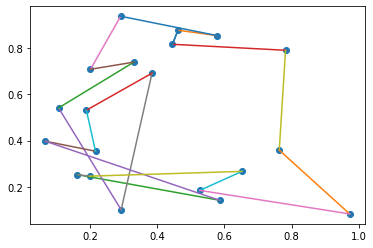

In [ ]:
reward_hist=[]
actor_lprob_hist=[]
critc_value_hist=[]
episodes=8000
total_distance=3000

epsilon=1
for episode in range(episodes):
  path=[0]
  episode_reward=0
  current_state=torch.tensor([0]).float()
  while len(path)<n:

    actor_prob,critic_value=model(current_state)
    
    if epsilon>random.random():
      action=random.randint(0,n-1)
      while action in path:
        action=random.randint(0,n-1)
      current_action=action
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)
      #print('actor_prob {} log_prob {}'.format(actor_prob[action],math.log(actor_prob[action])))   
    else:
      sorted_prob=actor_prob.argsort(descending=True)
      for action in sorted_prob:
        if action not in path:
          current_action=action.item()
          break
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)
      #print('actor_prob {} log_prob {}'.format(actor_prob[action],math.log(actor_prob[current_action])))                                        
    
    critc_value_hist.append(critic_value)                                     #V(s)

    
    r=-float(dist_mat[int(current_state),current_action])
    reward_hist.append(r)
    episode_reward+=r
    
    current_state=torch.tensor([current_action]).float() 
    path.append(current_action)
    

  path.append(path[0])                                                         #Final path
  episode_reward-=dist_mat[path[-2],path[-1]]                                  #Total distance
  
  returns=[]
  critic_loss=[]
  actor_loss=[]
  ds=0
  
  for r in reward_hist[::-1]:
    ds=r+gamma*ds
    returns.insert(0,ds)
  returns=torch.tensor(returns)
  returns=returns-returns.mean()/returns.std()+eps

  hist=zip(actor_lprob_hist,critc_value_hist,returns)


  for log_prob,v_c,ret in hist:
    adv=ret.float()-v_c.item()
    #print('adv {:.2f}'.format(adv))
    actor_loss.append(-log_prob*adv)                                           #-log(pi)*V
    #print('actor_loss',-log_prob*adv)
    critic_loss.append(F.smooth_l1_loss(v_c, torch.tensor([ret])))             #critic_loss
  
  opt.zero_grad()
  loss=torch.stack(actor_loss).sum()+torch.stack(critic_loss).sum()
  loss.backward()
  opt.step()
  epsilon = 1. - episode * 1/episodes
  #print('current_critic_value',current_critc_value_hist,"returns",returns)
  #print('reward_hist {} returns {} critic_value {}'.format(reward_hist,returns,current_critc_value_hist))
  
  actor_lprob_hist.clear()
  critc_value_hist.clear()
  reward_hist.clear()
  episode_reward*=-1
  if episode_reward<total_distance:
    total_distance=episode_reward
    shortest_path=path

  print('Episode no {} path {} episode_reward {:.2f}'.format(episode+1,path,-episode_reward),end="")
  print(" || loss {:.2f}".format(loss))
plt.scatter(coords[:,0],coords[:,1])
for i in shortest_path:
  plt.plot([coords[shortest_path[i],0],coords[shortest_path[i+1],0]],[coords[shortest_path[i],1],coords[shortest_path[i+1],1]])
print('Shortest Distance',total_distance)

#Policy Gradient

In [ ]:
import torch
import gym
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import math
from torch import optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt

In [ ]:
seed=1
torch.manual_seed(seed)
random.seed(seed)
gamma = 0.99
eps = np.finfo(np.float32).eps.item()
epsilon = 1. 

In [ ]:

class Actor_critic(nn.Module):
    def __init__(self,num_actions):
        super().__init__()
        self.layer1=nn.Linear(1,128)
        self.actor=nn.Linear(128,num_actions)
    def forward(self,state):
        common=F.relu(self.layer1(state))
        actor_prob=F.softmax(self.actor(common),dim=-1)
        
        return(actor_prob)

##4 nodes

In [ ]:
n=4
model=Actor_critic(n)
opt= optim.Adam(model.parameters(), lr=0.01)
coords=np.array([[0.39676747, 0.53881673],
        [0.41919451, 0.6852195 ],
        [0.20445225, 0.87811744],
        [0.02738759, 0.67046751]])
dist_mat=np. array([[0.        , 0.14811057, 0.39001296, 0.39213955],
        [0.14811057, 0.        , 0.28865872, 0.39208454],
        [0.39001296, 0.28865872, 0.        , 0.27289262],
        [0.39213955, 0.39208454, 0.27289262, 0.        ]])

Episode no 1 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 2.76
Episode no 2 path [0, 3, 2, 1, 0] episode_reward 1.10 || loss 2.85
Episode no 3 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 1.63
Episode no 4 path [0, 3, 2, 1, 0] episode_reward 1.10 || loss 2.24
Episode no 5 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 1.55
Episode no 6 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 1.54
Episode no 7 path [0, 3, 1, 2, 0] episode_reward 1.46 || loss 1.17
Episode no 8 path [0, 2, 1, 3, 0] episode_reward 1.46 || loss 1.59
Episode no 9 path [0, 3, 1, 2, 0] episode_reward 1.46 || loss 1.10
Episode no 10 path [0, 2, 3, 1, 0] episode_reward 1.20 || loss 1.30
Episode no 11 path [0, 1, 3, 2, 0] episode_reward 1.20 || loss 4.12
Episode no 12 path [0, 2, 1, 3, 0] episode_reward 1.46 || loss 1.33
Episode no 13 path [0, 2, 1, 3, 0] episode_reward 1.46 || loss 1.33
Episode no 14 path [0, 3, 2, 1, 0] episode_reward 1.10 || loss 1.96
Episode no 15 path [0, 2, 1, 3, 0] episode_reward 1.46 ||

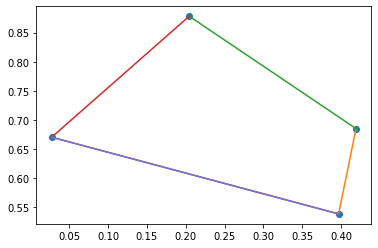

In [ ]:
reward_hist=[]
actor_lprob_hist=[]
episodes=1000
epsilon=1
total_distance=3000
for episode in range(episodes):
  path=[0]
  episode_reward=0
  current_state=torch.tensor([0]).float()
  while len(path)<n:

    actor_prob=model(current_state)
    
    if epsilon>random.random():
      action=random.randint(0,n-1)
      while action in path:
        action=random.randint(0,n-1)
      current_action=action
      actor_lprob_hist.append(torch.log(actor_prob[current_action]+0.00001)*0.423)
 
    else:
      sorted_prob=actor_prob.argsort(descending=True)
      for action in sorted_prob:
        if action not in path:
          current_action=action.item()
          break
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)


    
    r=-float(dist_mat[int(current_state),current_action])
    reward_hist.append(r)
    episode_reward+=r
    
    current_state=torch.tensor([current_action]).float() 
    path.append(current_action)
    

  path.append(path[0])                                                         #Final path
  episode_reward-=dist_mat[path[-2],path[-1]]                                  #Total distance
  
  returns=[]
  actor_loss=[]
  ds=0
  
  for r in reward_hist[::-1]:
    ds=r+gamma*ds
    returns.insert(0,ds)
  returns=torch.tensor(returns)
  returns=returns-returns.mean()/returns.std()+eps

  hist=zip(actor_lprob_hist,returns)
  for log_prob,ret in hist:
    actor_loss.append(-log_prob*ret)                                           
    
  opt.zero_grad()
  loss=torch.stack(actor_loss).sum()
  loss.backward()
  opt.step()
  epsilon = 1. - episode * 1/episodes

  
  actor_lprob_hist.clear()
  reward_hist.clear()
  episode_reward*=-1
  if episode_reward<total_distance:
    total_distance=episode_reward
    shortest_path=path

  print('Episode no {} path {} episode_reward {:.2f}'.format(episode+1,path,episode_reward),end="")
  print(" || loss {:.2f}".format(loss))
plt.scatter(coords[:,0],coords[:,1])
for i in shortest_path:
  plt.plot([coords[shortest_path[i],0],coords[shortest_path[i+1],0]],[coords[shortest_path[i],1],coords[shortest_path[i+1],1]])
print('Shortest Distance',total_distance)

##5 nodes

In [ ]:
n=5
model=Actor_critic(n)
opt= optim.Adam(model.parameters(), lr=0.01)
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])

Episode no 1 path [0, 2, 3, 1, 4, 0] episode_reward 16.29 || loss -17.49
Episode no 2 path [0, 3, 1, 2, 4, 0] episode_reward 12.36 || loss -14.73
Episode no 3 path [0, 3, 4, 1, 2, 0] episode_reward 12.87 || loss -17.42
Episode no 4 path [0, 3, 4, 1, 2, 0] episode_reward 12.87 || loss -23.56
Episode no 5 path [0, 2, 4, 3, 1, 0] episode_reward 15.92 || loss -56.65
Episode no 6 path [0, 4, 3, 1, 2, 0] episode_reward 16.76 || loss -69.10
Episode no 7 path [0, 2, 4, 1, 3, 0] episode_reward 11.52 || loss -33.94
Episode no 8 path [0, 3, 4, 1, 2, 0] episode_reward 12.87 || loss -50.47
Episode no 9 path [0, 4, 2, 3, 1, 0] episode_reward 16.29 || loss -86.13
Episode no 10 path [0, 4, 3, 1, 2, 0] episode_reward 16.76 || loss -82.06
Episode no 11 path [0, 4, 2, 1, 3, 0] episode_reward 12.36 || loss -52.89
Episode no 12 path [0, 2, 4, 1, 3, 0] episode_reward 11.52 || loss -52.05
Episode no 13 path [0, 3, 2, 1, 4, 0] episode_reward 13.24 || loss -71.65
Episode no 14 path [0, 4, 1, 3, 2, 0] episode_r

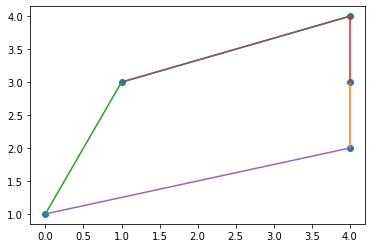

In [ ]:
reward_hist=[]
actor_lprob_hist=[]
episodes=1000
epsilon=1
total_distance=3000
for episode in range(episodes):
  path=[0]
  episode_reward=0
  current_state=torch.tensor([0]).float()
  while len(path)<n:

    actor_prob=model(current_state)
    
    if epsilon>random.random():
      action=random.randint(0,n-1)
      while action in path:
        action=random.randint(0,n-1)
      current_action=action
      actor_lprob_hist.append(torch.log(actor_prob[current_action]+0.00001)*0.423)
 
    else:
      sorted_prob=actor_prob.argsort(descending=True)
      for action in sorted_prob:
        if action not in path:
          current_action=action.item()
          break
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)


    
    r=-float(dist_mat[int(current_state),current_action])
    reward_hist.append(r)
    episode_reward+=r
    
    current_state=torch.tensor([current_action]).float() 
    path.append(current_action)
    

  path.append(path[0])                                                         #Final path
  episode_reward-=dist_mat[path[-2],path[-1]]                                  #Total distance
  
  returns=[]
  actor_loss=[]
  ds=0
  
  for r in reward_hist[::-1]:
    ds=r+gamma*ds
    returns.insert(0,ds)
  returns=torch.tensor(returns)
  returns=returns-returns.mean()/returns.std()+eps

  hist=zip(actor_lprob_hist,returns)
  for log_prob,ret in hist:
    actor_loss.append(-log_prob*ret)                                           
    
  opt.zero_grad()
  loss=torch.stack(actor_loss).sum()
  loss.backward()
  opt.step()
  epsilon = 1. - episode * 1/episodes

  
  actor_lprob_hist.clear()
  reward_hist.clear()
  episode_reward*=-1
  if episode_reward<total_distance:
    total_distance=episode_reward
    shortest_path=path

  print('Episode no {} path {} episode_reward {:.2f}'.format(episode+1,path,episode_reward),end="")
  print(" || loss {:.2f}".format(loss))
plt.scatter(coords[:,0],coords[:,1])
for i in shortest_path:
  plt.plot([coords[shortest_path[i],0],coords[shortest_path[i+1],0]],[coords[shortest_path[i],1],coords[shortest_path[i+1],1]])
print('Shortest Distance',total_distance)

##10 nodes

In [ ]:
n=10
model=Actor_critic(n)
opt= optim.Adam(model.parameters(), lr=0.01)
coords=np.array([[0.96222682, 0.81789497],
       [0.01782511, 0.93226486],
       [0.3518051 , 0.82315222],
       [0.33063835, 0.57929051],
       [0.02360734, 0.4305754 ],
       [0.29650064, 0.28795597],
       [0.53866827, 0.23490321],
       [0.70254764, 0.60307924],
       [0.71190645, 0.15977665],
       [0.36290907, 0.12392136]])
dist_mat=np.array([[0.        , 0.95130178, 0.61044436, 0.67515633, 1.01539302,
        0.85089758, 0.72061171, 0.33701494, 0.70411647, 0.91694118],
       [0.95130178, 0.        , 0.35135197, 0.47163865, 0.50172278,
        0.70199288, 0.87039697, 0.75974214, 1.03850227, 0.87892102],
       [0.61044436, 0.35135197, 0.        , 0.2447786 , 0.51169359,
        0.5380461 , 0.61721531, 0.41406816, 0.75481132, 0.69931902],
       [0.67515633, 0.47163865, 0.2447786 , 0.        , 0.34115133,
        0.29332781, 0.40234197, 0.37266932, 0.5668838 , 0.45651119],
       [1.01539302, 0.50172278, 0.51169359, 0.34115133, 0.        ,
        0.30791404, 0.55097675, 0.70051232, 0.73965373, 0.45734272],
       [0.85089758, 0.70199288, 0.5380461 , 0.29332781, 0.30791404,
        0.        , 0.24791079, 0.51398137, 0.43473202, 0.17696732],
       [0.72061171, 0.87039697, 0.61721531, 0.40234197, 0.55097675,
        0.24791079, 0.        , 0.40300129, 0.18882655, 0.20786599],
       [0.33701494, 0.75974214, 0.41406816, 0.37266932, 0.70051232,
        0.51398137, 0.40300129, 0.        , 0.44340137, 0.58732158],
       [0.70411647, 1.03850227, 0.75481132, 0.5668838 , 0.73965373,
        0.43473202, 0.18882655, 0.44340137, 0.        , 0.3508344 ],
       [0.91694118, 0.87892102, 0.69931902, 0.45651119, 0.45734272,
        0.17696732, 0.20786599, 0.58732158, 0.3508344 , 0.        ]])

Episode no 1 path [0, 1, 7, 6, 9, 4, 3, 5, 8, 2, 0] episode_reward 5.21 || loss -3.30
Episode no 2 path [0, 4, 5, 8, 6, 3, 9, 7, 2, 1, 0] episode_reward 5.11 || loss -1.68
Episode no 3 path [0, 8, 2, 6, 7, 9, 3, 5, 4, 1, 0] episode_reward 5.58 || loss -4.13
Episode no 4 path [0, 4, 1, 7, 3, 9, 2, 8, 5, 6, 0] episode_reward 5.96 || loss -7.32
Episode no 5 path [0, 3, 4, 8, 9, 6, 2, 7, 5, 1, 0] episode_reward 5.51 || loss -8.71
Episode no 6 path [0, 4, 2, 8, 9, 7, 6, 1, 3, 5, 0] episode_reward 6.11 || loss -19.01
Episode no 7 path [0, 6, 2, 5, 9, 3, 1, 8, 7, 4, 0] episode_reward 6.18 || loss -4.59
Episode no 8 path [0, 9, 4, 5, 3, 7, 8, 6, 2, 1, 0] episode_reward 4.90 || loss -3.51
Episode no 9 path [0, 6, 8, 1, 5, 9, 7, 4, 3, 2, 0] episode_reward 5.31 || loss -24.10
Episode no 10 path [0, 2, 1, 6, 8, 4, 7, 3, 9, 5, 0] episode_reward 5.32 || loss -11.54
Episode no 11 path [0, 1, 9, 4, 8, 7, 2, 3, 5, 6, 0] episode_reward 5.39 || loss -18.55
Episode no 12 path [0, 5, 9, 4, 1, 3, 6, 8, 7, 2

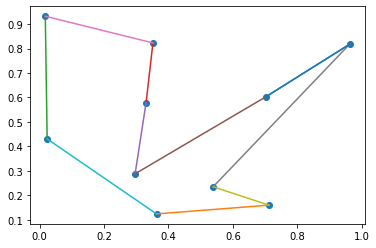

In [ ]:
reward_hist=[]
actor_lprob_hist=[]
episodes=4000
epsilon=1
total_distance=3000
for episode in range(episodes):
  path=[0]
  episode_reward=0
  current_state=torch.tensor([0]).float()
  while len(path)<n:

    actor_prob=model(current_state)
    
    if epsilon>random.random():
      action=random.randint(0,n-1)
      while action in path:
        action=random.randint(0,n-1)
      current_action=action
      actor_lprob_hist.append(torch.log(actor_prob[current_action]+0.00001)*0.423)
 
    else:
      sorted_prob=actor_prob.argsort(descending=True)
      for action in sorted_prob:
        if action not in path:
          current_action=action.item()
          break
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)


    
    r=-float(dist_mat[int(current_state),current_action])
    reward_hist.append(r)
    episode_reward+=r
    
    current_state=torch.tensor([current_action]).float() 
    path.append(current_action)
    

  path.append(path[0])                                                         #Final path
  episode_reward-=dist_mat[path[-2],path[-1]]                                  #Total distance
  
  returns=[]
  actor_loss=[]
  ds=0
  
  for r in reward_hist[::-1]:
    ds=r+gamma*ds
    returns.insert(0,ds)
  returns=torch.tensor(returns)
  returns=returns-returns.mean()/returns.std()+eps

  hist=zip(actor_lprob_hist,returns)
  for log_prob,ret in hist:
    actor_loss.append(-log_prob*ret)                                           
    
  opt.zero_grad()
  loss=torch.stack(actor_loss).sum()
  loss.backward()
  opt.step()
  epsilon = 1. - episode * 1/episodes

  
  actor_lprob_hist.clear()
  reward_hist.clear()
  episode_reward*=-1
  if episode_reward<total_distance:
    total_distance=episode_reward
    shortest_path=path

  print('Episode no {} path {} episode_reward {:.2f}'.format(episode+1,path,episode_reward),end="")
  print(" || loss {:.2f}".format(loss))
plt.scatter(coords[:,0],coords[:,1])
for i in shortest_path:
  plt.plot([coords[shortest_path[i],0],coords[shortest_path[i+1],0]],[coords[shortest_path[i],1],coords[shortest_path[i+1],1]])
print('Shortest Distance',total_distance)

##20 nodes

In [ ]:
n=20
model=Actor_critic(n)
opt= optim.Adam(model.parameters(), lr=0.01)
coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[0.        , 0.60001635, 0.69288158, 0.57828654, 0.19026258,
        0.74614952, 0.18085482, 0.31029269, 0.3314574 , 0.79518088,
        0.69595595, 0.11921825, 0.20112521, 0.68394958, 0.94464125,
        0.4404823 , 0.48896882, 0.63981237, 0.62148559, 0.06305272],
       [0.60001635, 0.        , 0.6096485 , 0.54643148, 0.57611814,
        0.2801591 , 0.74710006, 0.66153736, 0.43257423, 0.5363238 ,
        0.2936458 , 0.5286757 , 0.50420209, 0.57504916, 0.34629786,
        0.59903565, 0.68129507, 0.14390819, 0.69684521, 0.5574272 ],
       [0.69288158, 0.6096485 , 0.        , 0.11472279, 0.5152005 ,
        0.43726687, 0.69741322, 0.45760971, 0.82029961, 0.20019115,
        0.37011518, 0.73140247, 0.49214671, 0.03700231, 0.82736361,
        0.280085  , 0.29420794, 0.48979777, 0.17340941, 0.63098083],
       [0.57828654, 0.54643148, 0.11472279, 0.        , 0.40229003,
        0.42563941, 0.58895042, 0.35501951, 0.71433719, 0.26453563,
        0.3530685 , 0.61758619, 0.37745903, 0.10916506, 0.80293554,
        0.17962112, 0.21741289, 0.44426651, 0.1555766 , 0.51630174],
       [0.19026258, 0.57611814, 0.5152005 , 0.40229003, 0.        ,
        0.64985727, 0.20233598, 0.13289996, 0.45378969, 0.64016338,
        0.58843568, 0.27307583, 0.07191649, 0.5107664 , 0.91813886,
        0.25165433, 0.29915086, 0.57173305, 0.43192382, 0.13808814],
       [0.74614952, 0.2801591 , 0.43726687, 0.42563941, 0.64985727,
        0.        , 0.84890351, 0.68464087, 0.67800129, 0.29566197,
        0.07305885, 0.71240533, 0.58566454, 0.40039258, 0.39123464,
        0.55569503, 0.6237957 , 0.14162712, 0.57799997, 0.68935477],
       [0.18085482, 0.74710006, 0.69741322, 0.58895042, 0.20233598,
        0.84890351, 0.        , 0.24641672, 0.51197429, 0.83749015,
        0.78924013, 0.29933824, 0.26325144, 0.69806256, 1.09326217,
        0.41921273, 0.43747985, 0.76213478, 0.5852434 , 0.19605849],
       [0.31029269, 0.66153736, 0.45760971, 0.35501951, 0.13289996,
        0.68464087, 0.24641672, 0.        , 0.58591801, 0.61481798,
        0.61647621, 0.40423899, 0.18378021, 0.46245904, 0.99282405,
        0.1775649 , 0.19217537, 0.6310855 , 0.33891272, 0.26668711],
       [0.3314574 , 0.43257423, 0.82029961, 0.71433719, 0.45378969,
        0.67800129, 0.51197429, 0.58591801, 0.        , 0.84582561,
        0.65771907, 0.21265702, 0.40923866, 0.79759615, 0.7332192 ,
        0.64659318, 0.71959818, 0.53979921, 0.81561159, 0.33733856],
       [0.79518088, 0.5363238 , 0.20019115, 0.26453563, 0.64016338,
        0.29566197, 0.83749015, 0.61481798, 0.84582561, 0.        ,
        0.24827655, 0.80598355, 0.59838216, 0.17315241, 0.67977252,
        0.44309958, 0.47858707, 0.39595434, 0.37286812, 0.73221293],
       [0.69595595, 0.2936458 , 0.37011518, 0.3530685 , 0.58843568,
        0.07305885, 0.78924013, 0.61647621, 0.65771907, 0.24827655,
        0.        , 0.67154895, 0.52668963, 0.33311421, 0.45741009,
        0.48358187, 0.55093118, 0.15021474, 0.50612738, 0.63725743],
       [0.11921825, 0.5286757 , 0.73140247, 0.61758619, 0.27307583,
        0.71240533, 0.29933824, 0.40423899, 0.21265702, 0.80598355,
        0.67154895, 0.        , 0.25299983, 0.71682005, 0.86599412,
        0.50566234, 0.5661908 , 0.59196952, 0.6857113 , 0.13849416],
       [0.20112521, 0.50420209, 0.49214671, 0.37745903, 0.07191649,
        0.58566454, 0.26325144, 0.18378021, 0.40923866, 0.59838216,
        0.52668963, 0.25299983, 0.        , 0.48282438, 0.84642083,
        0.25266693, 0.31600766, 0.50232732, 0.43292366, 0.13884631],
       [0.68394958, 0.57504916, 0.03700231, 0.10916506, 0.5107664 ,
        0.40039258, 0.69806256, 0.46245904, 0.79759615, 0.17315241,
        0.33311421, 0.71682005, 0.48282438, 0.        , 0.79037877,
        0.28546752, 0.30945139, 0.45363729, 0.20068363, 0.62148642],
       [0.94464125, 0.34629786, 0.82736361, 0.80293554, 0.91813886,
        0.39123464, 1.09326217, 0.99282405, 0.7332192 , 0.67977252,
        0.45741009, 0.86599412, 0.84642083, 0.79037877, 0.        ,
        0.90237746, 0.97968778, 0.3692403 , 0.9582732 , 0.90352714],
       [0.4404823 , 0.59903565, 0.280085  , 0.17962112, 0.25165433,
        0.55569503, 0.41921273, 0.1775649 , 0.64659318, 0.44309958,
        0.48358187, 0.50566234, 0.25266693, 0.28546752, 0.90237746,
        0.        , 0.08333794, 0.53313762, 0.18134226, 0.38327394],
       [0.48896882, 0.68129507, 0.29420794, 0.21741289, 0.29915086,
        0.6237957 , 0.43747985, 0.19217537, 0.71959818, 0.47858707,
        0.55093118, 0.5661908 , 0.31600766, 0.30945139, 0.97968778,
        0.08333794, 0.        , 0.610796  , 0.14934068, 0.43642365],
       [0.63981237, 0.14390819, 0.48979777, 0.44426651, 0.57173305,
        0.14162712, 0.76213478, 0.6310855 , 0.53979921, 0.39595434,
        0.15021474, 0.59196952, 0.50232732, 0.45363729, 0.3692403 ,
        0.53313762, 0.610796  , 0.        , 0.5994127 , 0.58756916],
       [0.62148559, 0.69684521, 0.17340941, 0.1555766 , 0.43192382,
        0.57799997, 0.5852434 , 0.33891272, 0.81561159, 0.37286812,
        0.50612738, 0.6857113 , 0.43292366, 0.20068363, 0.9582732 ,
        0.18134226, 0.14934068, 0.5994127 , 0.        , 0.56461214],
       [0.06305272, 0.5574272 , 0.63098083, 0.51630174, 0.13808814,
        0.68935477, 0.19605849, 0.26668711, 0.33733856, 0.73221293,
        0.63725743, 0.13849416, 0.13884631, 0.62148642, 0.90352714,
        0.38327394, 0.43642365, 0.58756916, 0.56461214, 0.        ]])

Streaming output truncated to the last 5000 lines.
Episode no 3002 path [0, 1, 10, 15, 2, 16, 11, 19, 12, 18, 17, 5, 8, 9, 4, 6, 14, 3, 13, 7, 0] episode_reward 9.11 || loss -248.98
Episode no 3003 path [0, 1, 4, 11, 5, 12, 13, 8, 6, 18, 19, 10, 14, 3, 16, 17, 15, 2, 7, 9, 0] episode_reward 11.10 || loss -299.62
Episode no 3004 path [0, 6, 11, 4, 1, 19, 13, 15, 2, 16, 10, 9, 12, 18, 17, 14, 7, 5, 8, 3, 0] episode_reward 9.82 || loss -275.91
Episode no 3005 path [0, 13, 10, 11, 19, 2, 12, 18, 17, 8, 6, 4, 5, 1, 15, 9, 14, 7, 3, 16, 0] episode_reward 9.94 || loss -264.35
Episode no 3006 path [0, 6, 8, 2, 11, 15, 10, 3, 18, 12, 19, 9, 17, 16, 5, 4, 14, 13, 1, 7, 0] episode_reward 10.58 || loss -312.95
Episode no 3007 path [0, 4, 7, 11, 18, 9, 10, 19, 17, 12, 16, 2, 6, 1, 8, 3, 5, 15, 14, 13, 0] episode_reward 10.32 || loss -302.69
Episode no 3008 path [0, 13, 5, 11, 17, 10, 15, 14, 19, 1, 8, 3, 2, 18, 9, 6, 4, 12, 7, 16, 0] episode_reward 9.17 || loss -210.10
Episode no 3009 path [0, 4, 1

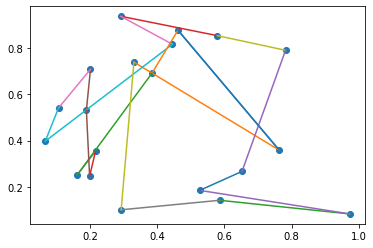

In [ ]:
reward_hist=[]
actor_lprob_hist=[]
episodes=8000
epsilon=1
total_distance=3000
for episode in range(episodes):
  path=[0]
  episode_reward=0
  current_state=torch.tensor([0]).float()
  while len(path)<n:

    actor_prob=model(current_state)
    
    if epsilon>random.random():
      action=random.randint(0,n-1)
      while action in path:
        action=random.randint(0,n-1)
      current_action=action
      actor_lprob_hist.append(torch.log(actor_prob[current_action]+0.00001)*0.423)
 
    else:
      sorted_prob=actor_prob.argsort(descending=True)
      for action in sorted_prob:
        if action not in path:
          current_action=action.item()
          break
      actor_lprob_hist.append(torch.log(actor_prob[action]+0.00001)*0.423)


    
    r=-float(dist_mat[int(current_state),current_action])
    reward_hist.append(r)
    episode_reward+=r
    
    current_state=torch.tensor([current_action]).float() 
    path.append(current_action)
    

  path.append(path[0])                                                         #Final path
  episode_reward-=dist_mat[path[-2],path[-1]]                                  #Total distance
  
  returns=[]
  actor_loss=[]
  ds=0
  
  for r in reward_hist[::-1]:
    ds=r+gamma*ds
    returns.insert(0,ds)
  returns=torch.tensor(returns)
  returns=returns-returns.mean()/returns.std()+eps

  hist=zip(actor_lprob_hist,returns)
  for log_prob,ret in hist:
    actor_loss.append(-log_prob*ret)                                           
    
  opt.zero_grad()
  loss=torch.stack(actor_loss).sum()
  loss.backward()
  opt.step()
  epsilon = 1. - episode * 1/episodes

  
  actor_lprob_hist.clear()
  reward_hist.clear()
  episode_reward*=-1
  if episode_reward<total_distance:
    total_distance=episode_reward
    shortest_path=path

  print('Episode no {} path {} episode_reward {:.2f}'.format(episode+1,path,episode_reward),end="")
  print(" || loss {:.2f}".format(loss))
plt.scatter(coords[:,0],coords[:,1])
for i in shortest_path:
  plt.plot([coords[shortest_path[i],0],coords[shortest_path[i+1],0]],[coords[shortest_path[i],1],coords[shortest_path[i+1],1]])
print('Shortest Distance',total_distance)